In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile

In [2]:
pd.pandas.set_option('display.max_columns', None)

In [3]:
#extracting zipfile
with zipfile.ZipFile('/content/house-prices-advanced-regression-techniques.zip', 'r') as zipref:
  zipref.extractall('/content')

In [4]:
train_df = pd.read_csv('train.csv')
eval_df = pd.read_csv('test.csv')

In [ ]:
train_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [ ]:
train_df.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1455          2000     Gable  CompShg     VinylSd     VinylSd        NaN   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd        NaN   
1458          1996       Hip  CompShg     MetalSd     MetalSd        NaN   
1459          1965     Gable  CompShg     HdBoard     HdBoard        NaN   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1455         0.0        TA        TA      PConc       Gd       TA   
1456       119.0        TA        TA     CBlock       Gd       TA   
1457         0.0        Ex        Gd      Stone       TA       Gd   
1458         0.0        TA        TA     CBlock       TA       TA   
1459         0.0        Gd        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1455           No          Unf           0          Unf           0   
1456           No          ALQ         790          Rec         163   
1457           No          GLQ         275          Unf           0   
1458           Mn          GLQ          49          Rec        1029   
1459           No          BLQ         830          LwQ         290   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1455        953          953    GasA        Ex          Y      SBrkr   
1456        589         1542    GasA        TA          Y      SBrkr   
1457        877         1152    GasA        Ex          Y      SBrkr   
1458          0         1078    GasA        Gd          Y      FuseA   
1459        136         1256    GasA        Gd          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1455       953       694             0       1647             0             0   
1456      2073         0             0       2073             1             0   
1457      1188      1152             0       2340             0             0   
1458      1078         0             0       1078             1             0   
1459      1256         0             0       1256             1             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1455         2         1             3             1          TA   
1456         2         0             3             1          TA   
1457         2         0             4             1          Gd   
1458         1         0             2             1          Gd   
1459         1         1             3             1          TA   

   

In [ ]:
train_df.shape

(1460, 81)

In [ ]:
null_cols = [feature for feature in train_df.columns if train_df[feature].isnull().sum() > 0]
null_cols

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [ ]:
pd.Series({col: train_df[col].isnull().sum() for col in null_cols})


LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


How is null values affecting the sales price?

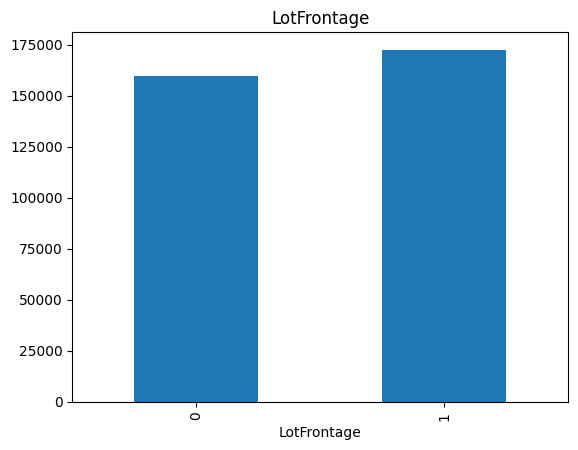

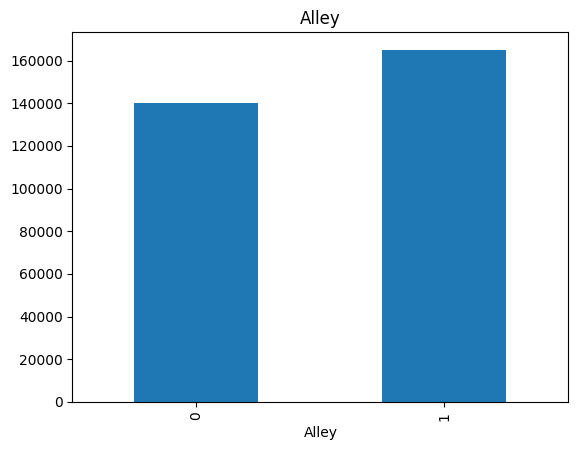

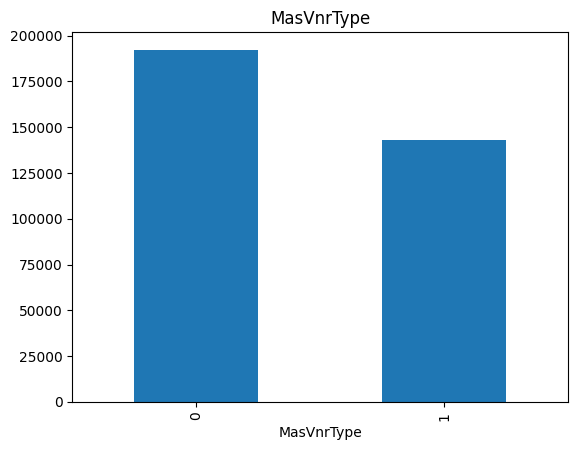

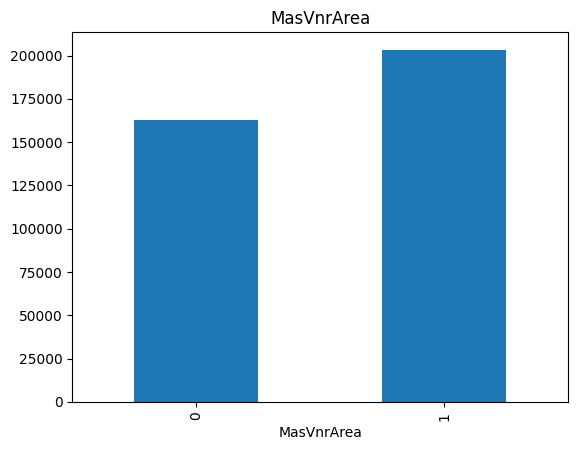

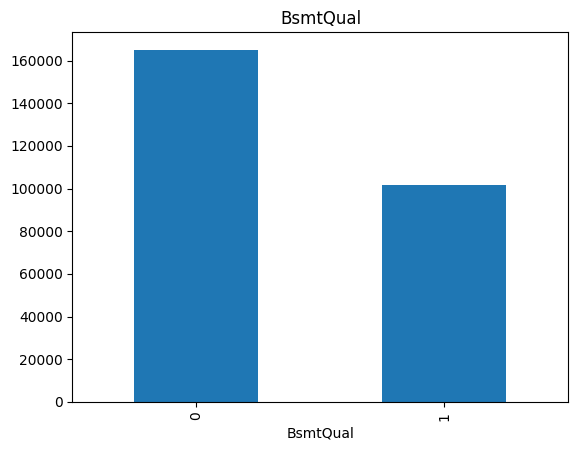

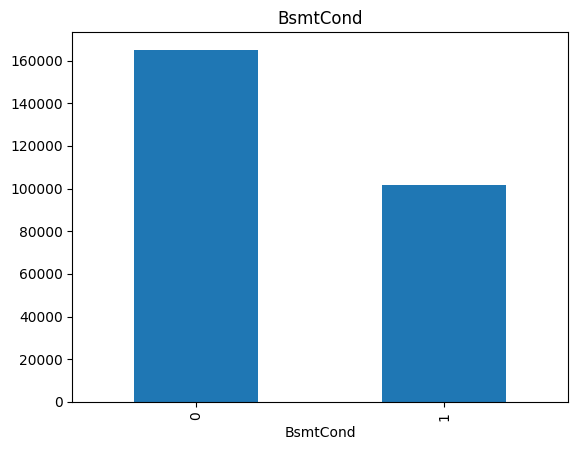

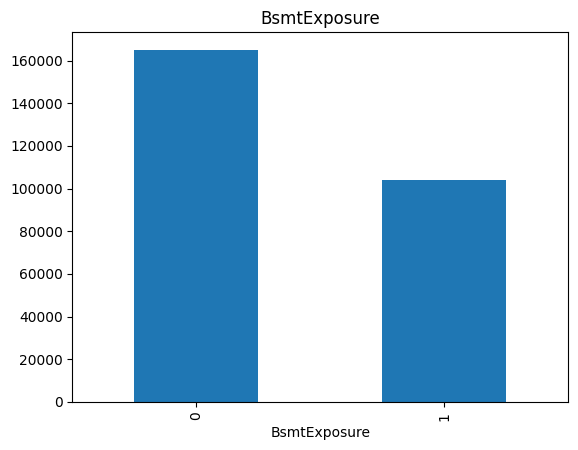

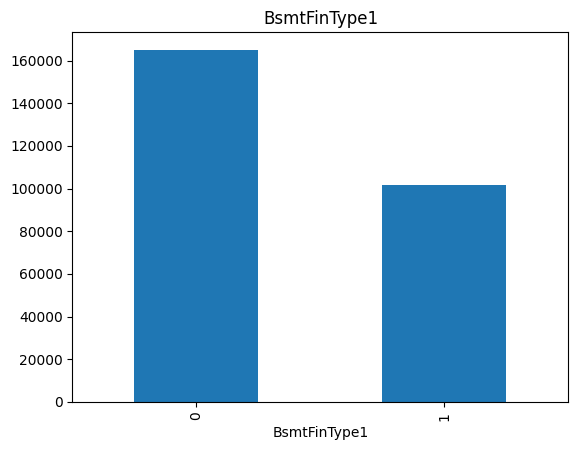

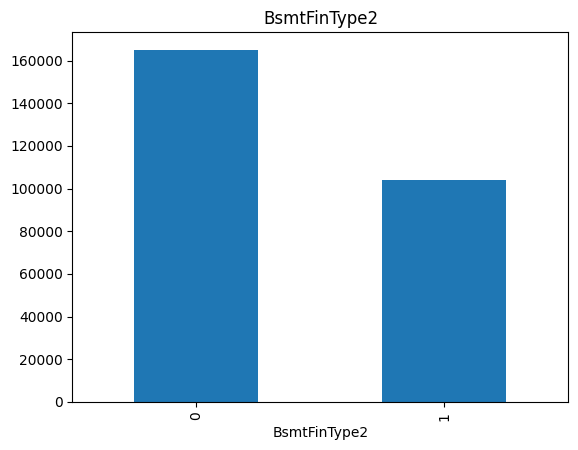

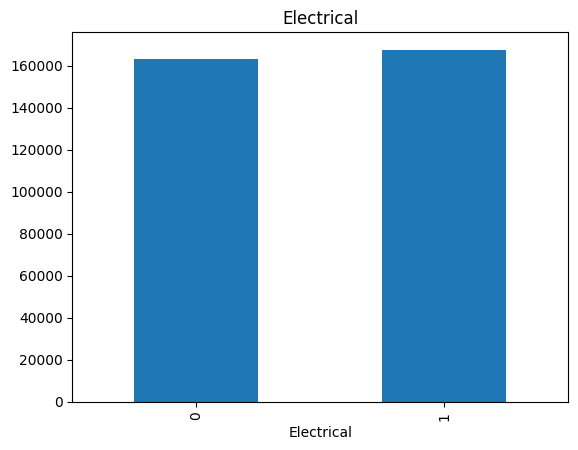

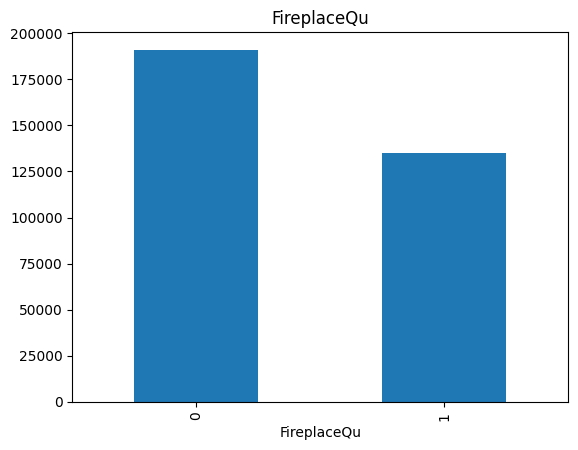

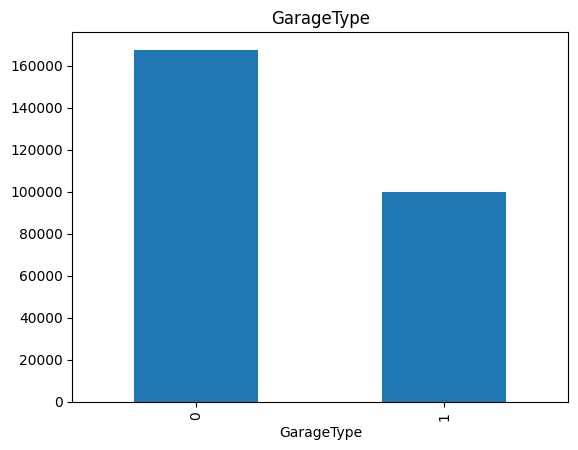

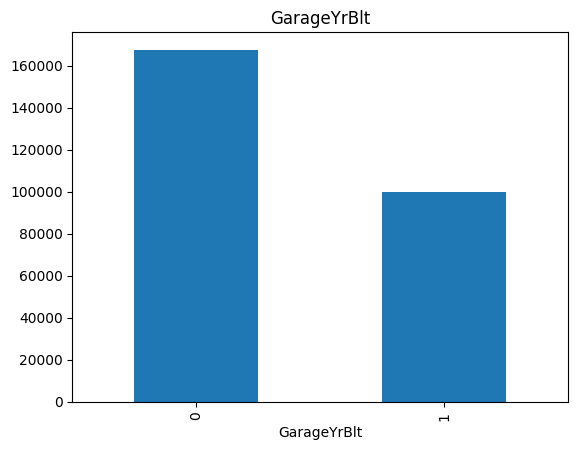

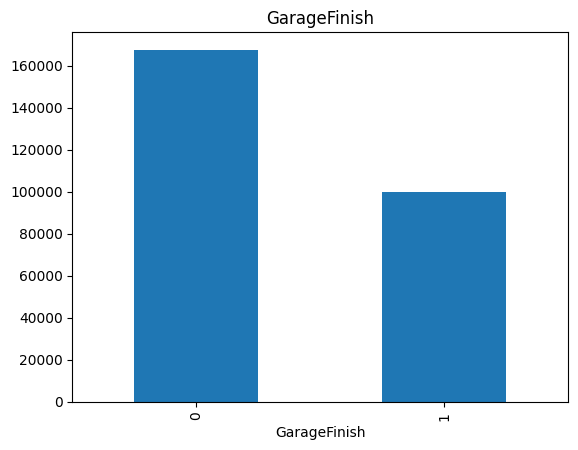

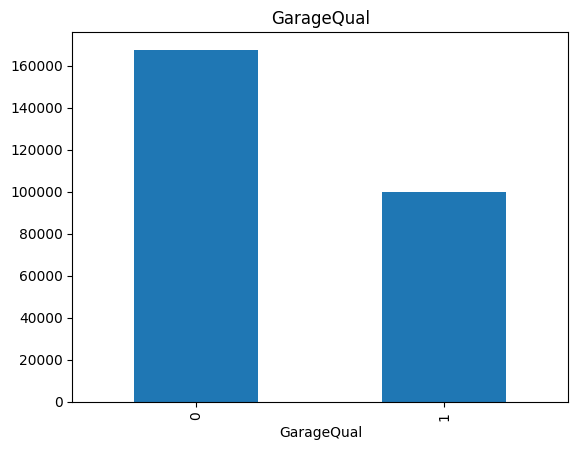

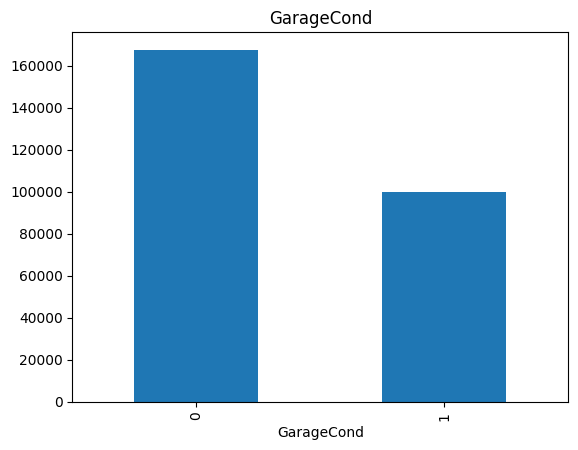

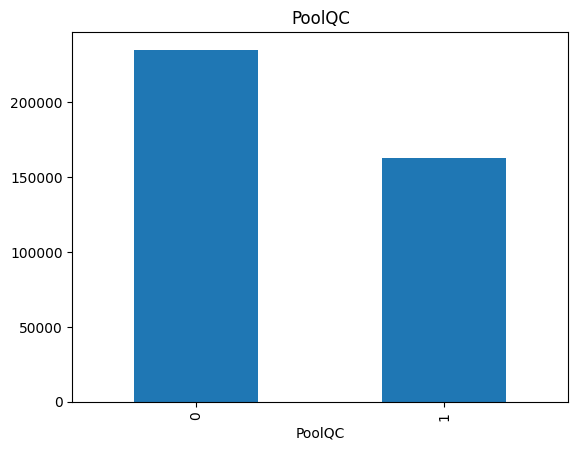

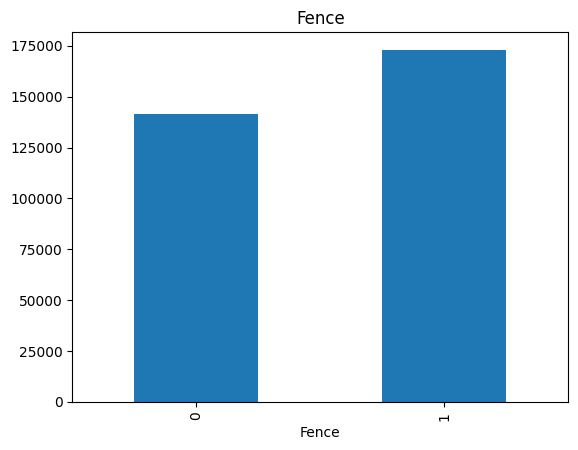

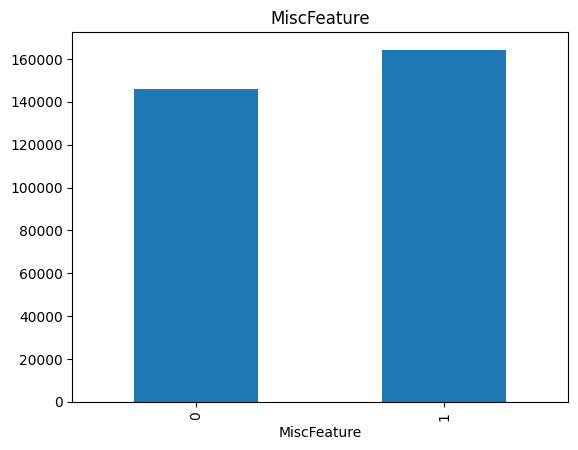

In [ ]:
for features in null_cols:
  data = train_df.copy()

  data[features] = np.where(data[features].isnull(), 1, 0)
  data.groupby(features)['SalePrice'].median().plot.bar()
  plt.title(features)
  plt.show()

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
temporal_features = [feature for feature in train_df.columns if 'Year' in feature or 'Yr' in feature]
temporal_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [ ]:
train_df[temporal_features].head()

YearBuilt  YearRemodAdd  GarageYrBlt  YrSold
0       2003          2003       2003.0    2008
1       1976          1976       1976.0    2007
2       2001          2002       2001.0    2008
3       1915          1970       1998.0    2006
4       2000          2000       2000.0    2008

temporal features and salesprice relationship check

<Axes: title={'center': 'Mean Sale Price by Year Sold'}, xlabel='Year Sold', ylabel='Mean Sale Price'>

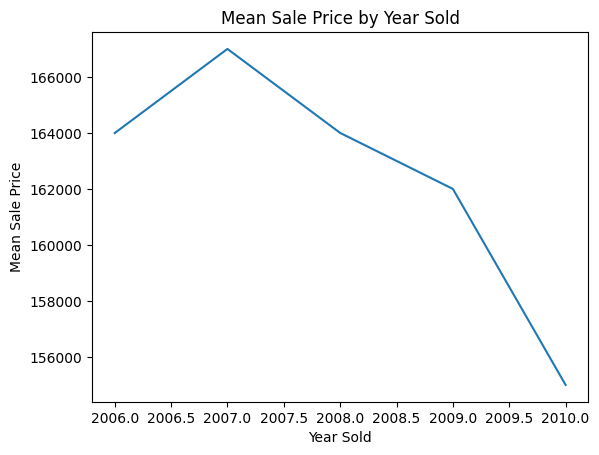

In [ ]:
train_df.groupby('YrSold')['SalePrice'].median().plot(kind = 'line',  title='Median Sale Price by Year Sold', xlabel='Year Sold', ylabel='Median Sale Price')


<Axes: title={'center': 'Median Sale Price by Year Build'}, xlabel='Year Built', ylabel='Median Sale Price'>

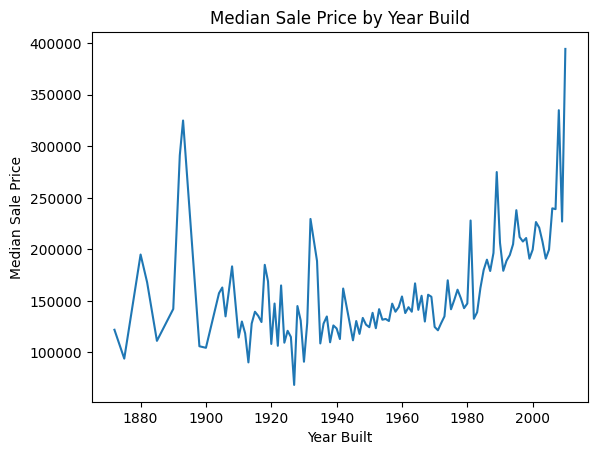

In [ ]:
train_df.groupby('YearBuilt')['SalePrice'].median().plot(kind = 'line',  title='Median Sale Price by Year Build', xlabel='Year Built', ylabel='Median Sale Price')


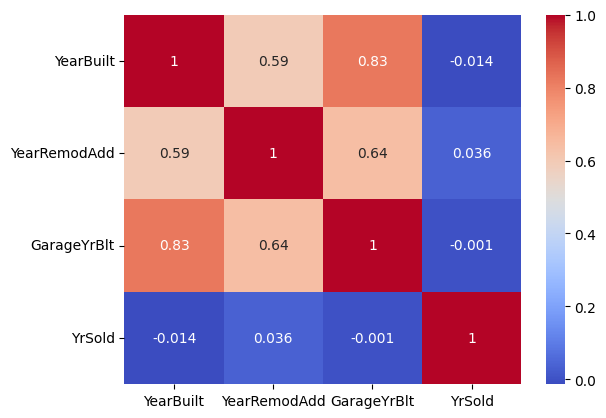

In [ ]:
corr_matrix = train_df[temporal_features].corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.show()

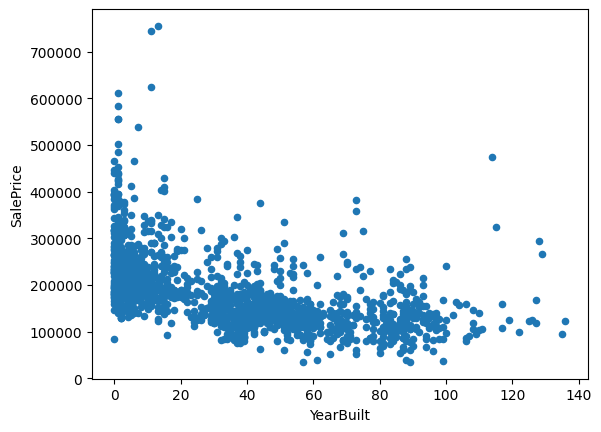

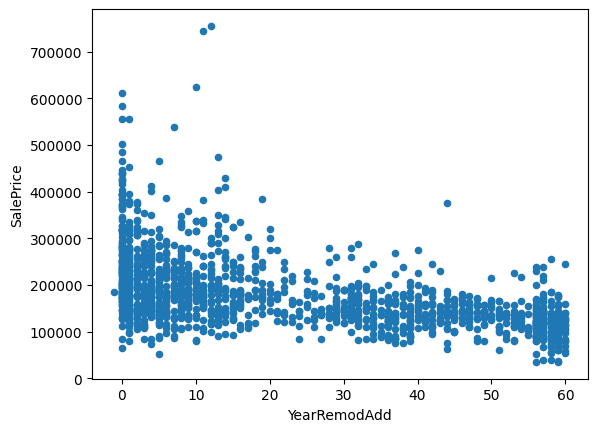

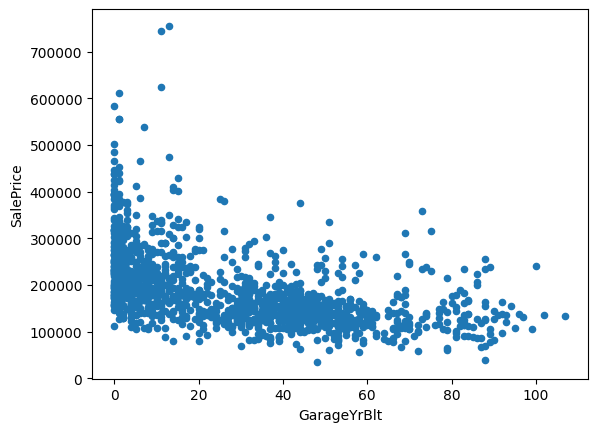

In [ ]:
for feature in temporal_features:
      if feature!='YrSold':
        data=train_df.copy()
        ## We will capture the difference between year variable and year the house was sold for
        data[feature]=data['YrSold']-data[feature]

        data.plot(kind = 'scatter', x = feature, y = 'SalePrice')
        plt.show()

In [ ]:
discrete_features = [feature for feature in train_df.columns if train_df[feature].nunique() < 25 and feature not in temporal_features and train_df[feature].dtype != 'O']
discrete_features

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [ ]:
for feature in discrete_features:
  print('The feature of {} and their count is {}'. format(feature, train_df[feature].nunique()))

The feature of MSSubClass and their count is 15
The feature of OverallQual and their count is 10
The feature of OverallCond and their count is 9
The feature of LowQualFinSF and their count is 24
The feature of BsmtFullBath and their count is 4
The feature of BsmtHalfBath and their count is 3
The feature of FullBath and their count is 4
The feature of HalfBath and their count is 3
The feature of BedroomAbvGr and their count is 8
The feature of KitchenAbvGr and their count is 4
The feature of TotRmsAbvGrd and their count is 12
The feature of Fireplaces and their count is 4
The feature of GarageCars and their count is 5
The feature of 3SsnPorch and their count is 20
The feature of PoolArea and their count is 8
The feature of MiscVal and their count is 21
The feature of MoSold and their count is 12


In [ ]:
train_df[discrete_features].head()

MSSubClass  OverallQual  OverallCond  LowQualFinSF  BsmtFullBath  \
0          60            7            5             0             1   
1          20            6            8             0             0   
2          60            7            5             0             1   
3          70            7            5             0             1   
4          60            8            5             0             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0             0         2         1             3             1             8   
1             1         2         0             3             1             6   
2             0         2         1             3             1             6   
3             0         1         0             3             1             7   
4             0         2         1             4             1             9   

   Fireplaces  GarageCars  3SsnPorch  PoolArea  MiscVal  MoSold  
0           0           2          0         0        0       2  
1           1           2          0         0        0       5  
2           1           2          0         0        0       9  
3           1           3          0         0        0       2  
4           1           3          0         0        0      12

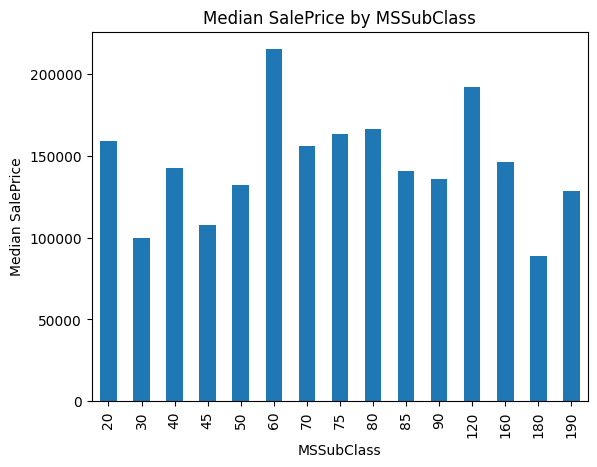

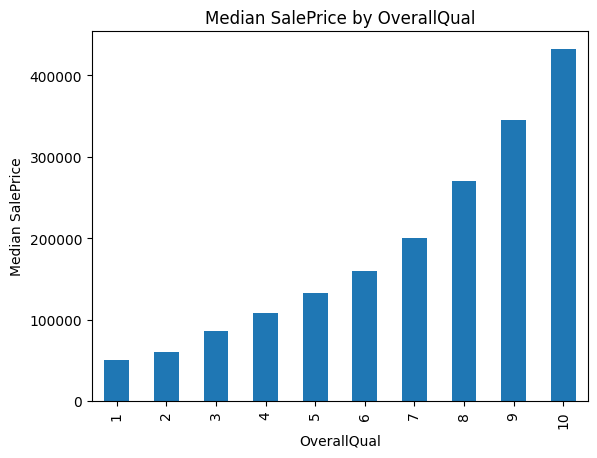

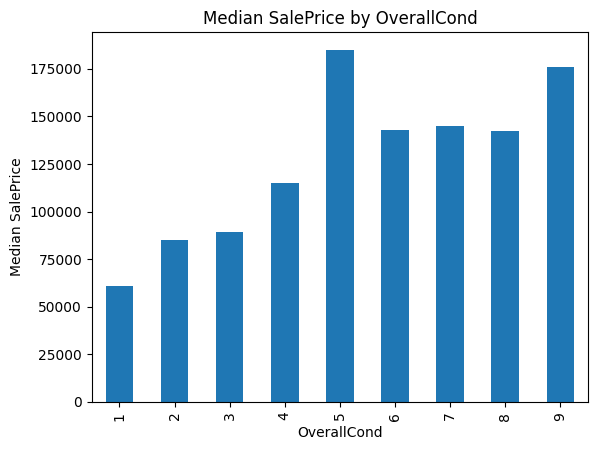

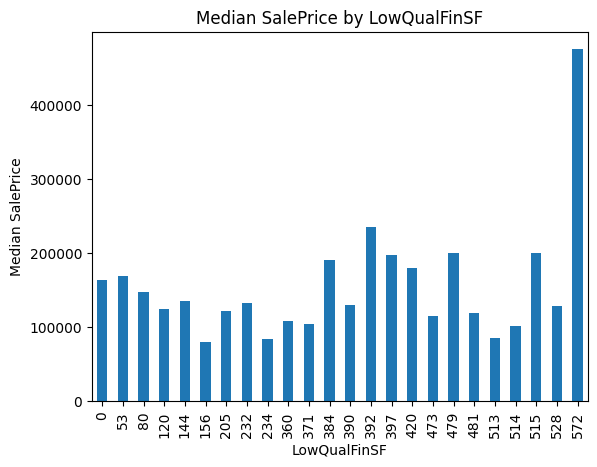

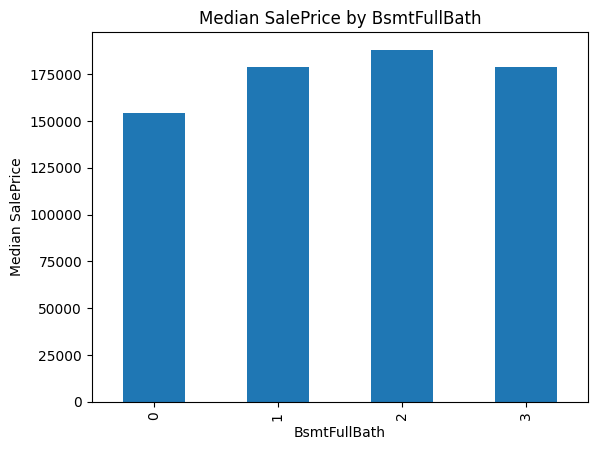

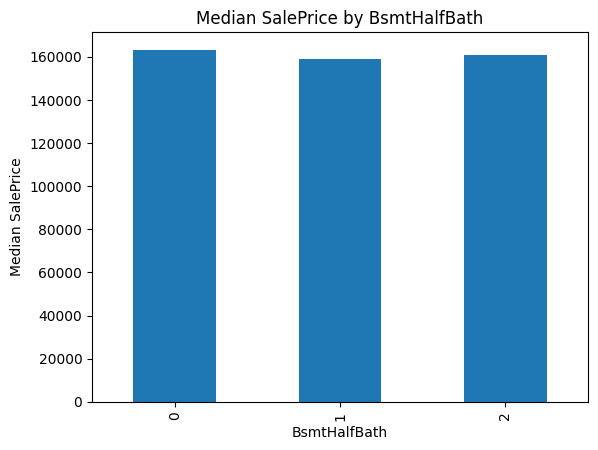

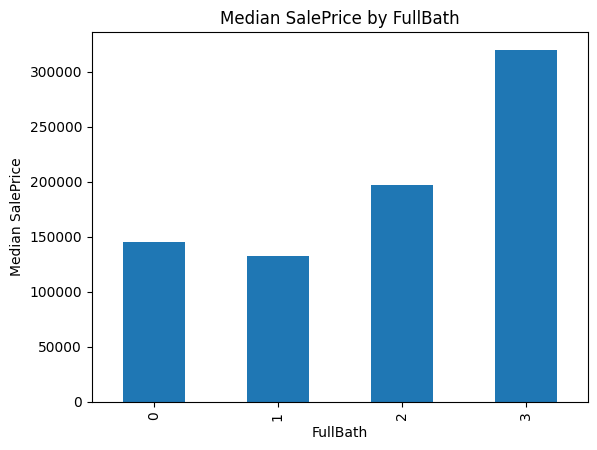

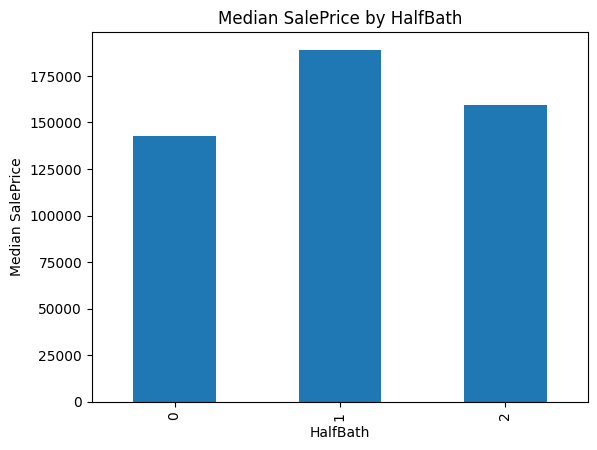

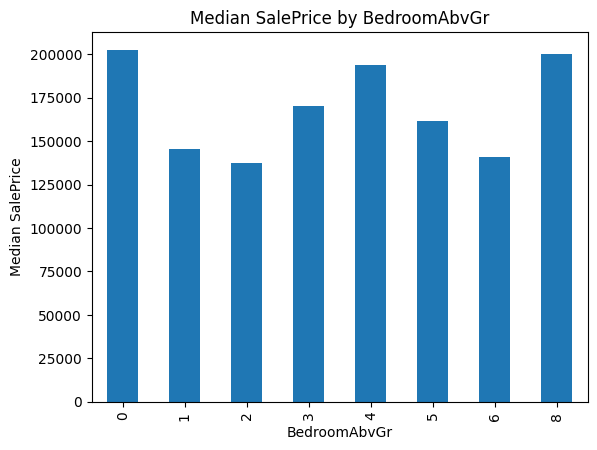

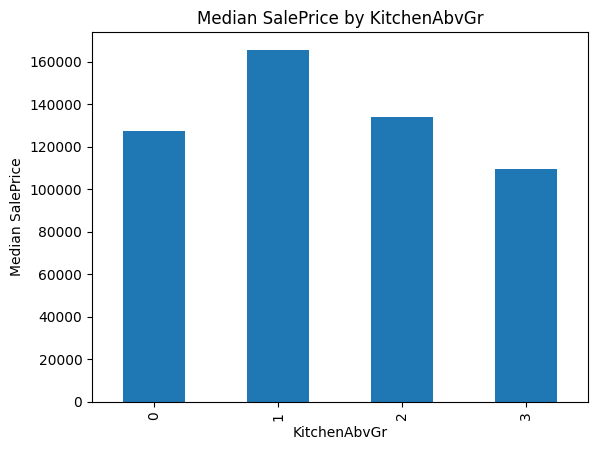

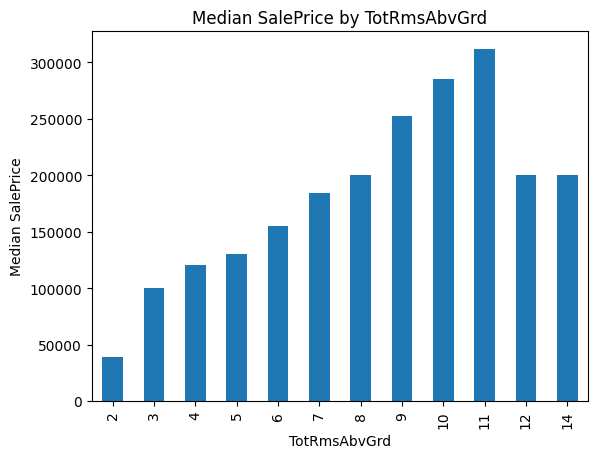

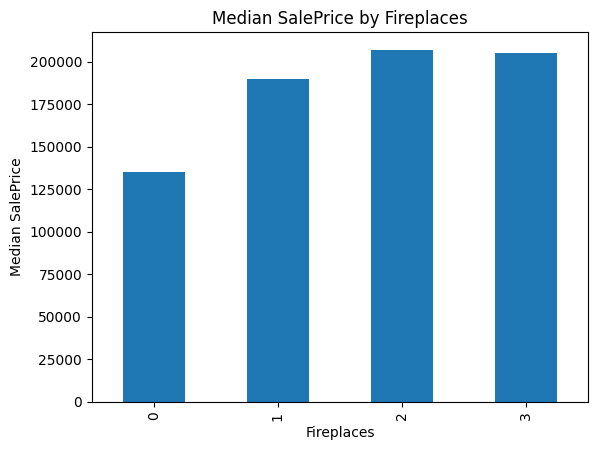

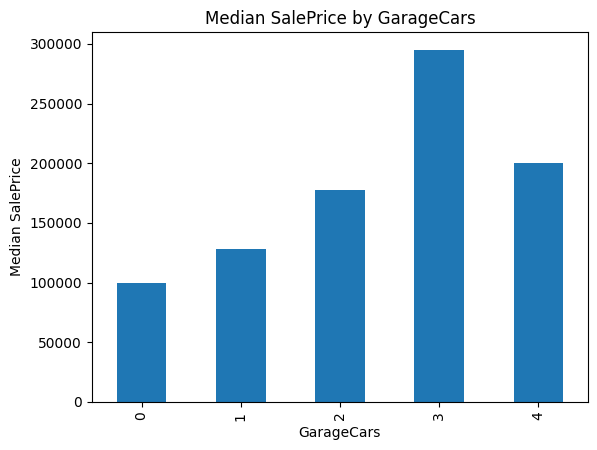

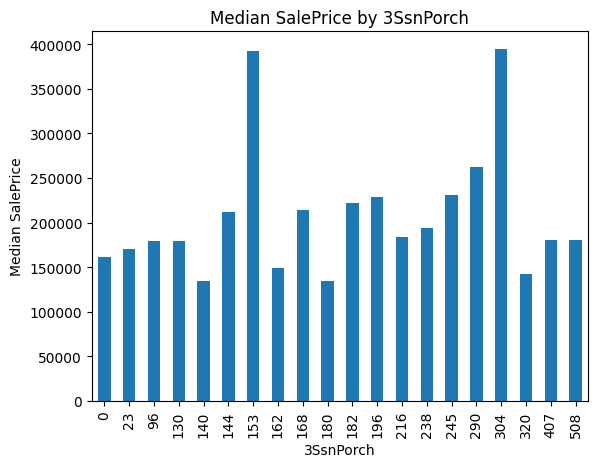

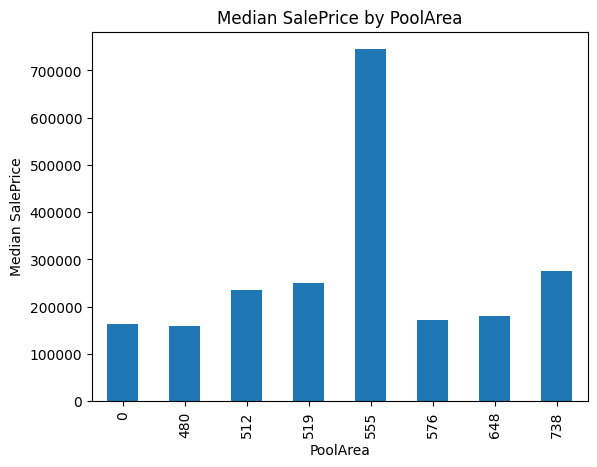

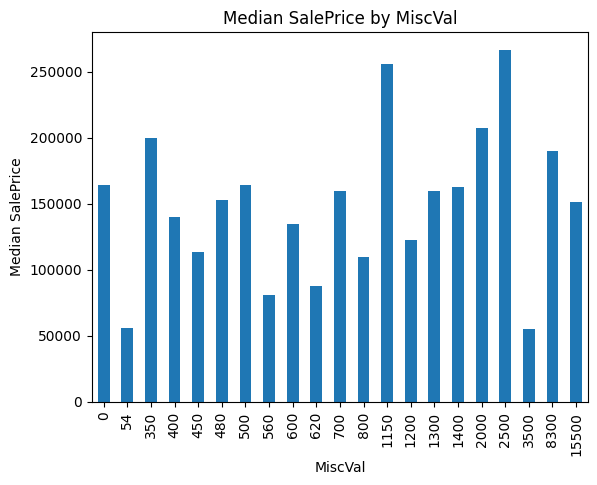

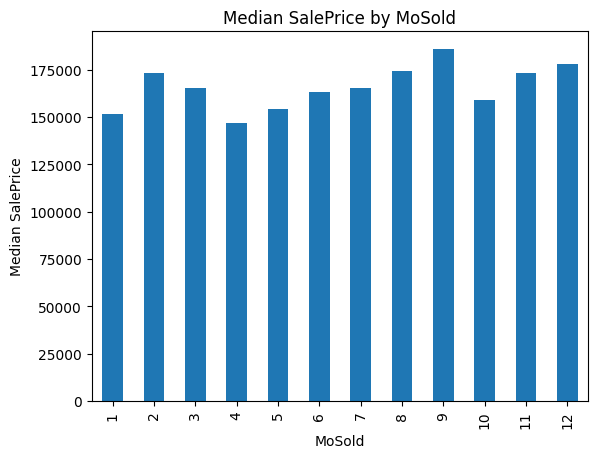

In [ ]:
for feature in discrete_features:
    data = train_df.copy()
    medians = data.groupby(feature)['SalePrice'].median()
    medians.plot.bar()
    plt.title(f"Median SalePrice by {feature}")
    plt.xlabel(feature)
    plt.ylabel("Median SalePrice")
    plt.show()

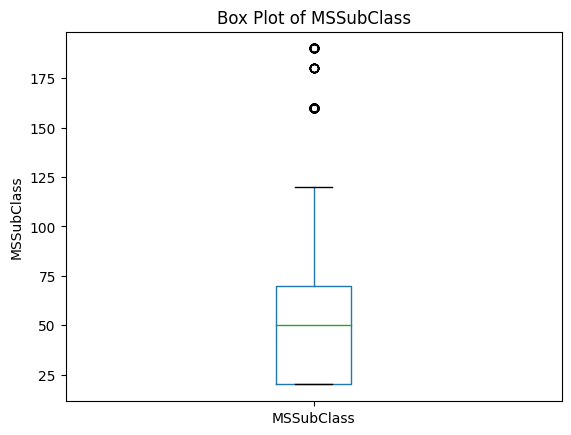

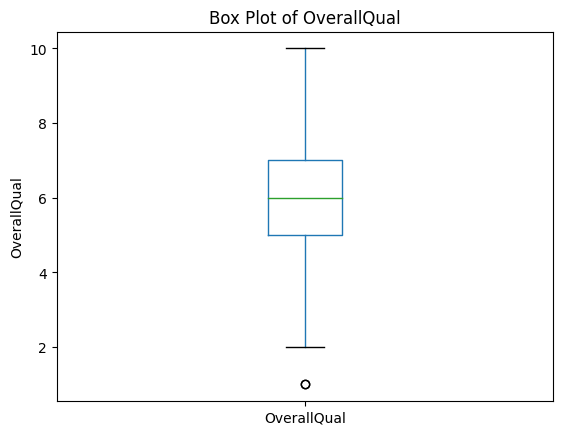

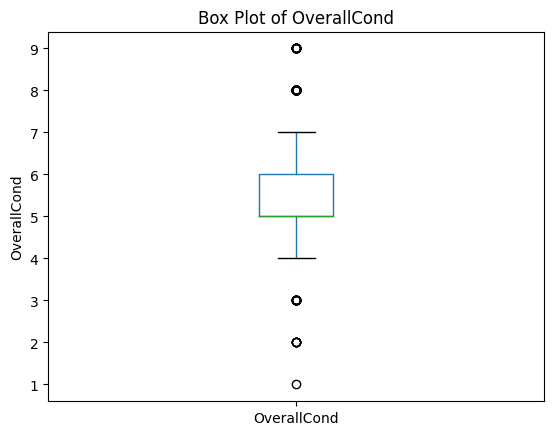

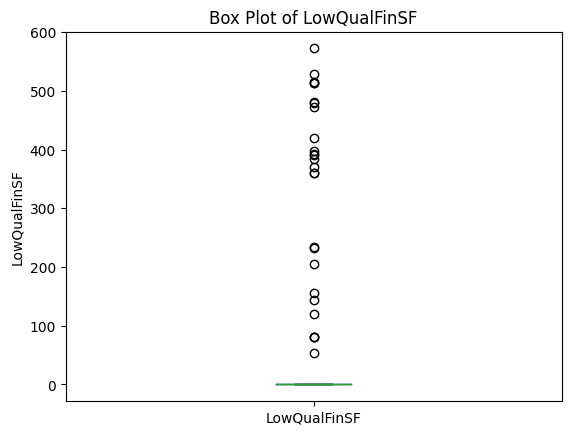

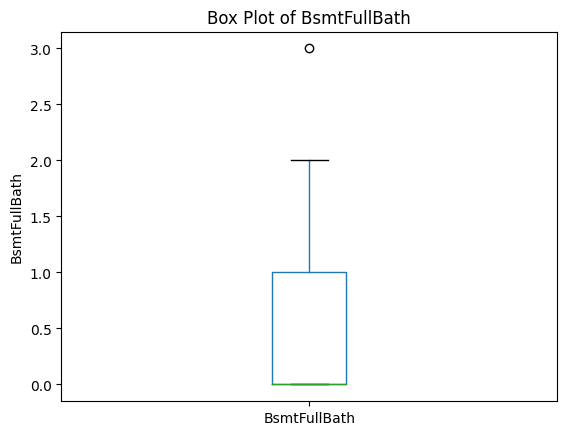

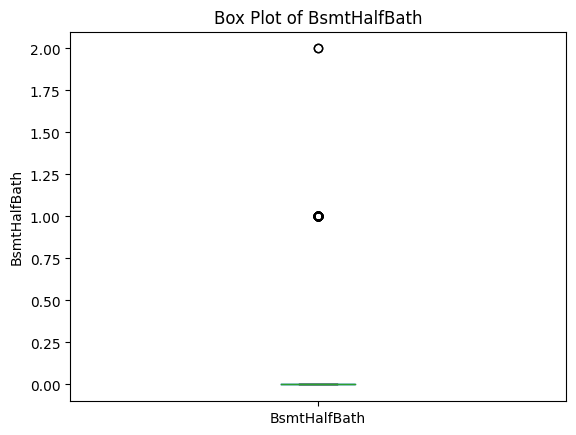

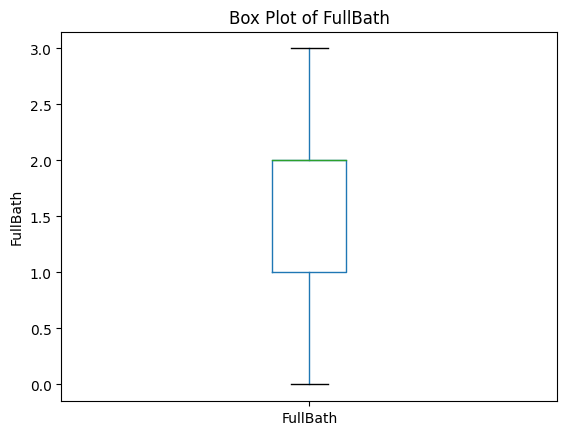

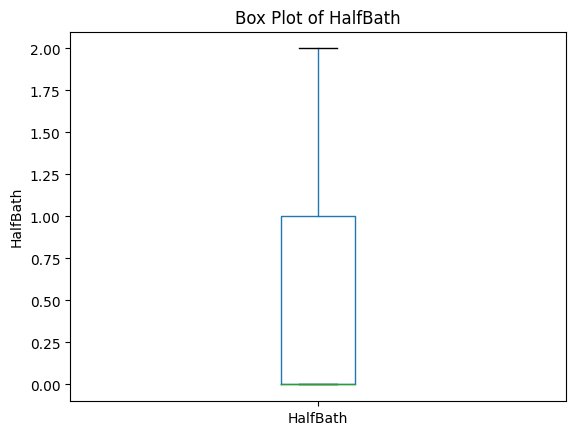

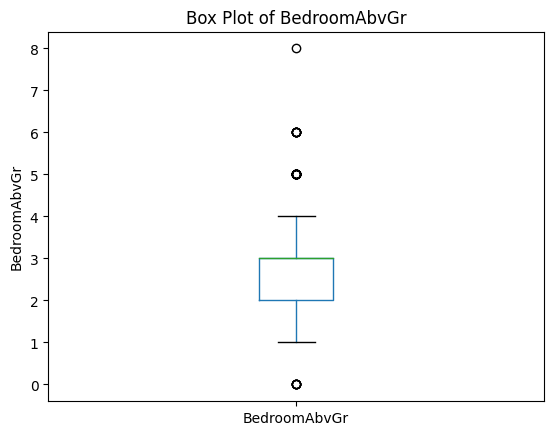

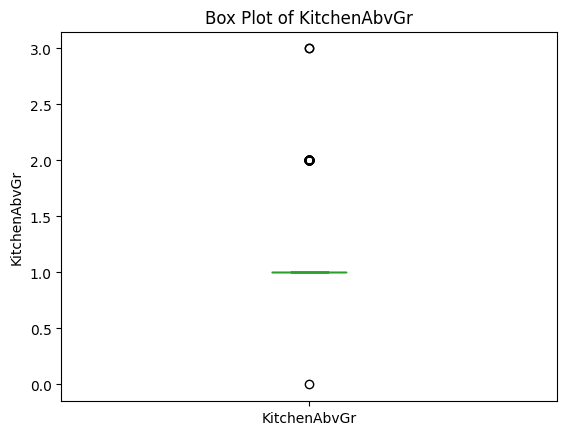

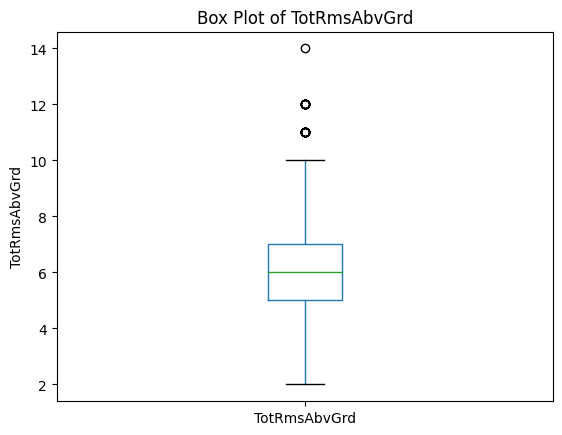

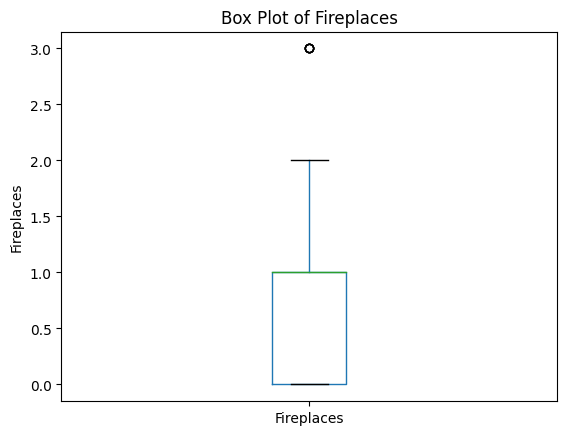

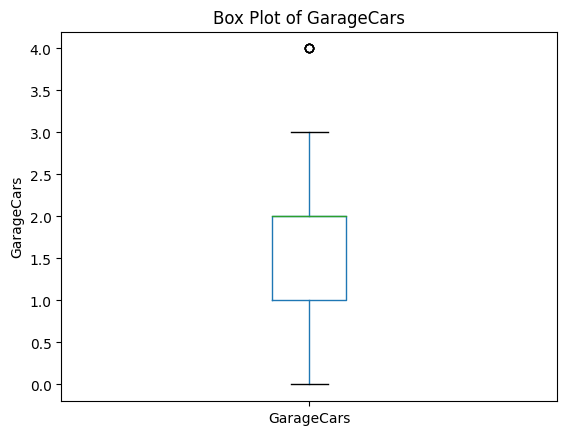

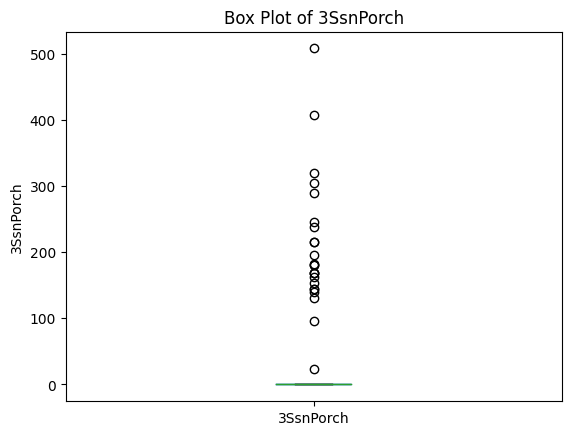

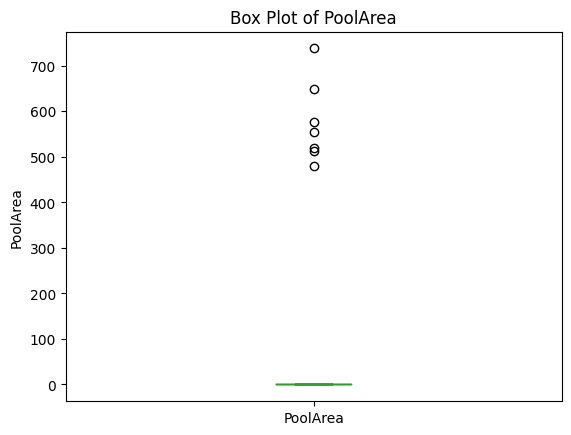

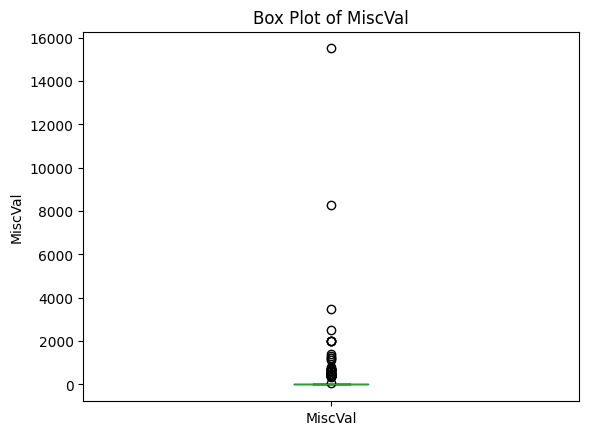

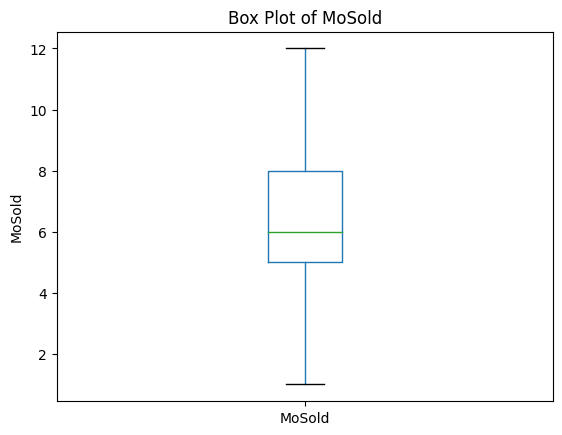

In [ ]:
for feature in discrete_features:
       data = train_df.copy()
       #data[feature] = np.log(data[feature])
       plt.figure()
       data.boxplot(column = feature, grid = False)
       plt.title(f"Box Plot of {feature}")
       plt.ylabel(feature)
       plt.show()

In [ ]:
continuous_features = [feature for feature in train_df.columns if feature not in discrete_features + temporal_features + ['Id'] and train_df[feature].dtype != 'O']
continuous_features

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

In [ ]:
train_df[continuous_features].head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   
2         68.0    11250       162.0         486           0        434   
3         60.0     9550         0.0         216           0        540   
4         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  GarageArea  WoodDeckSF  \
0          856       856       854       1710         548           0   
1         1262      1262         0       1262         460         298   
2          920       920       866       1786         608           0   
3          756       961       756       1717         642           0   
4         1145      1145      1053       2198         836         192   

   OpenPorchSF  EnclosedPorch  ScreenPorch  SalePrice  
0           61              0            0     208500  
1            0              0            0     181500  
2           42              0            0     223500  
3           35            272            0     140000  
4           84              0            0     250000

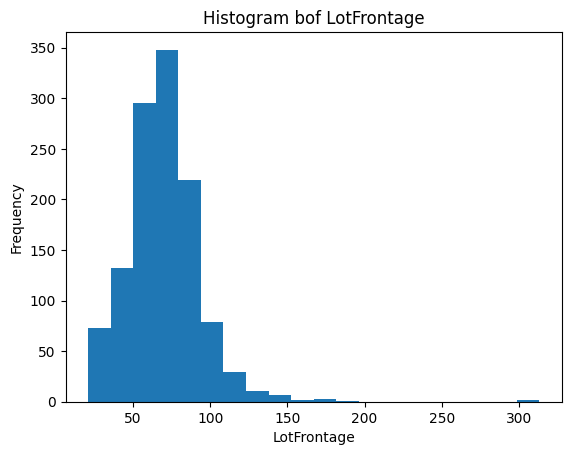

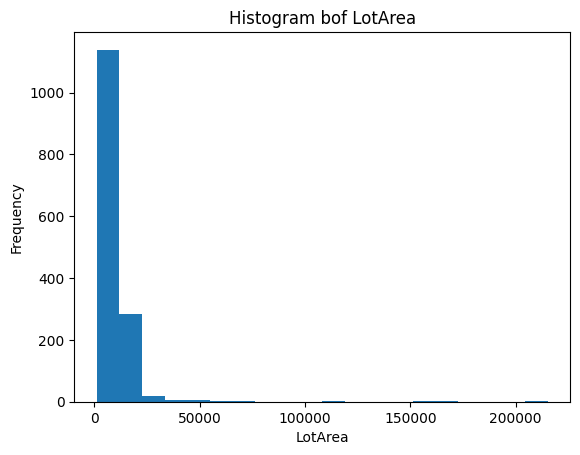

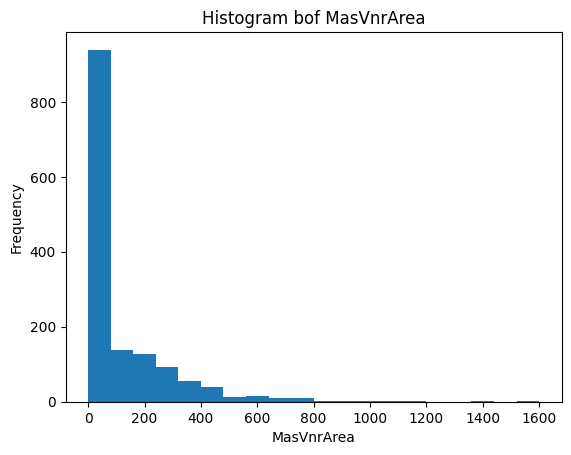

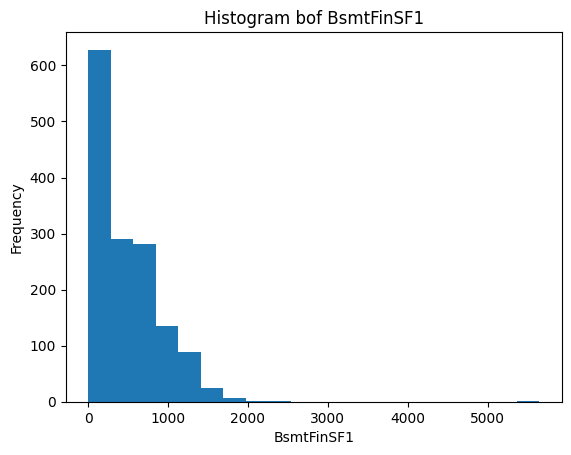

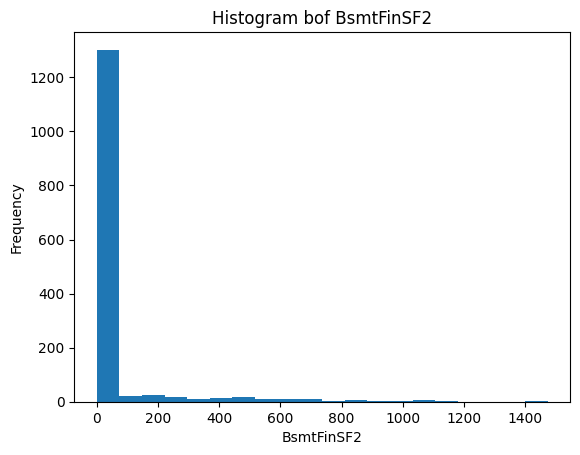

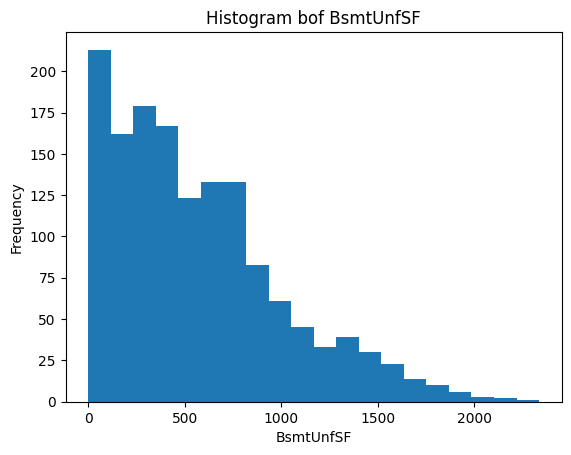

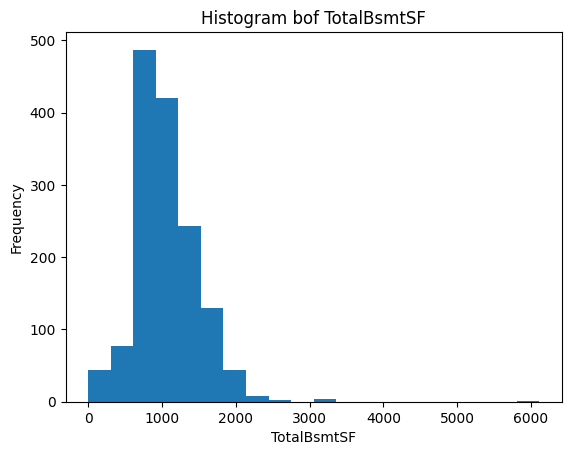

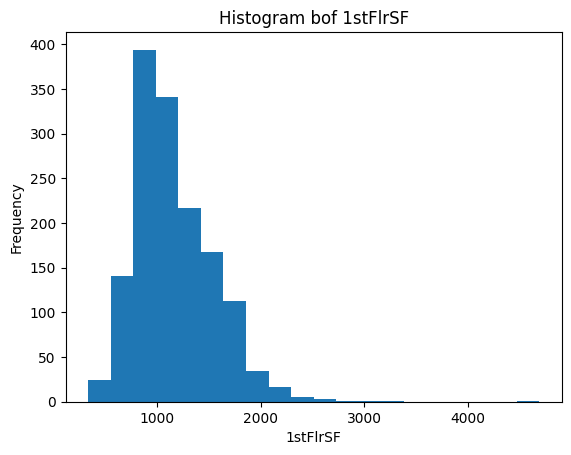

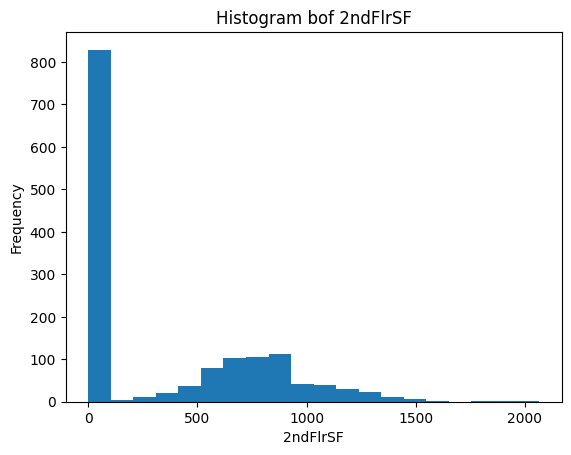

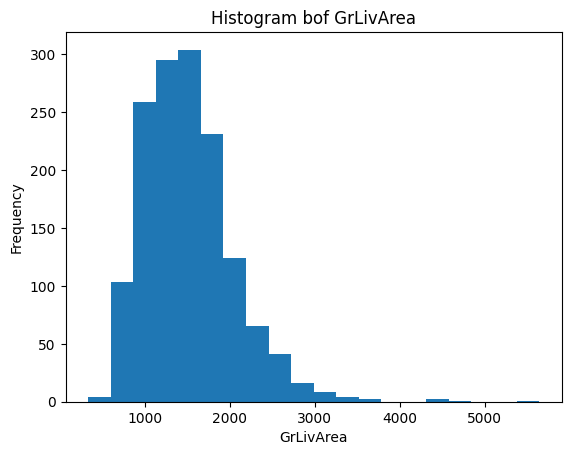

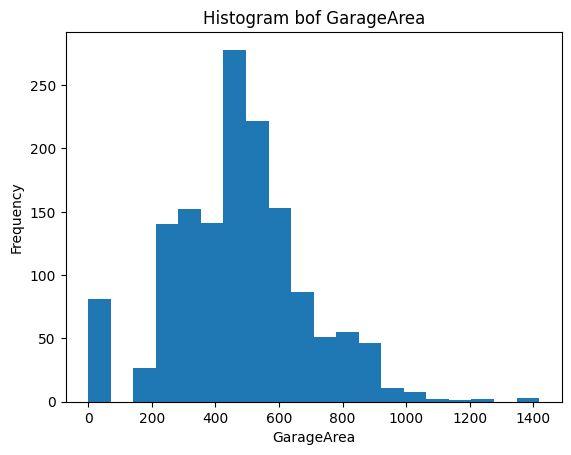

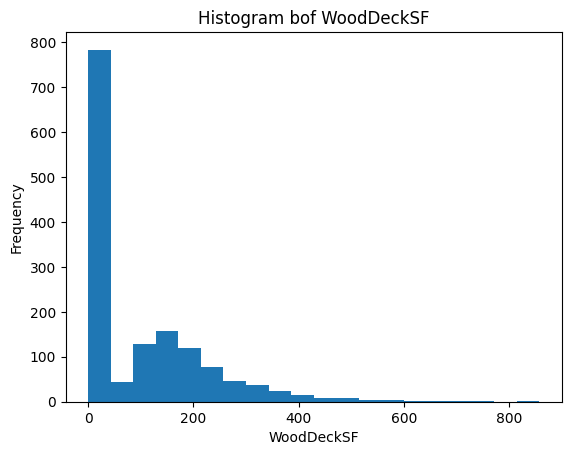

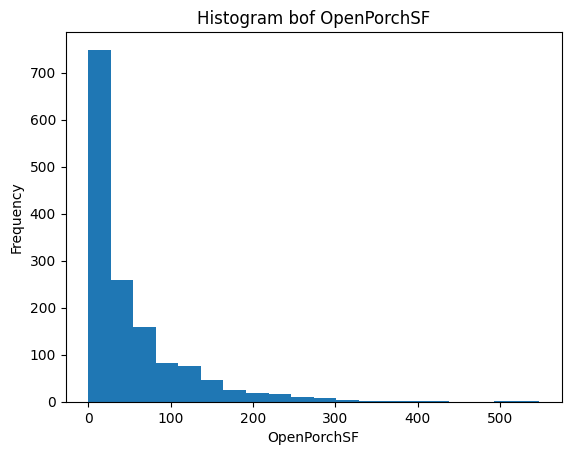

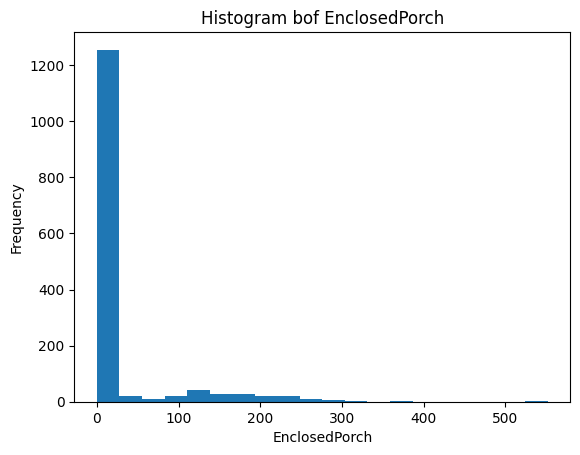

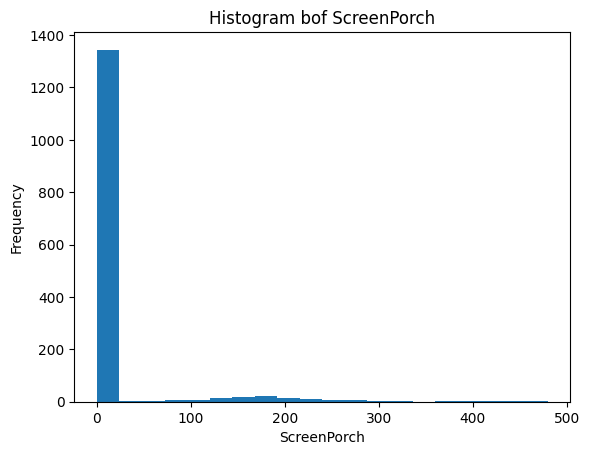

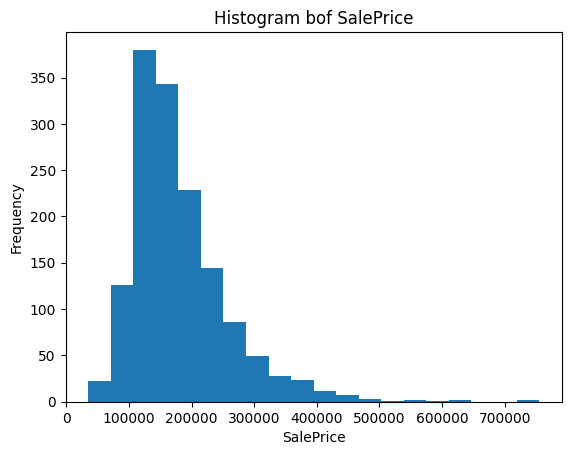

In [ ]:
for feature in continuous_features:
  data = train_df.copy()
  data[feature].plot.hist(bins = 20)
  plt.title(f"Histogram bof {feature}")
  plt.xlabel(feature)
  plt.ylabel("Frequency")
  plt.show()

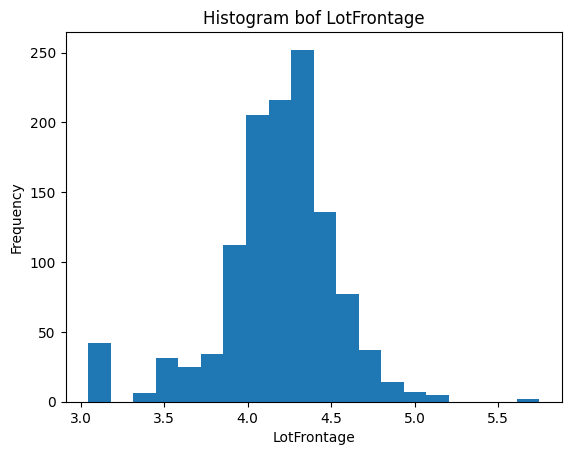

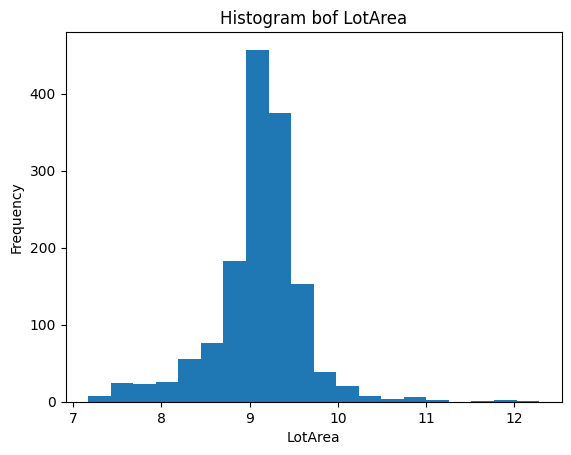

Skipping MasVnrArea because it contains zero values.
Skipping BsmtFinSF1 because it contains zero values.
Skipping BsmtFinSF2 because it contains zero values.
Skipping BsmtUnfSF because it contains zero values.
Skipping TotalBsmtSF because it contains zero values.


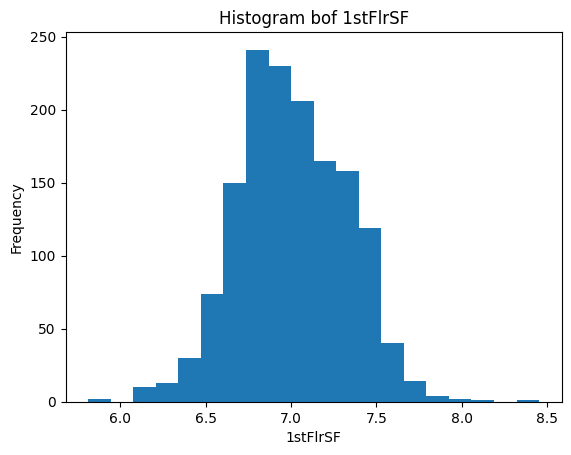

Skipping 2ndFlrSF because it contains zero values.


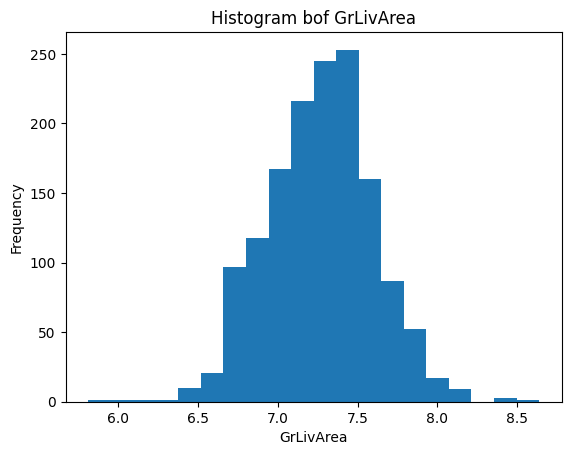

Skipping GarageArea because it contains zero values.
Skipping WoodDeckSF because it contains zero values.
Skipping OpenPorchSF because it contains zero values.
Skipping EnclosedPorch because it contains zero values.
Skipping ScreenPorch because it contains zero values.


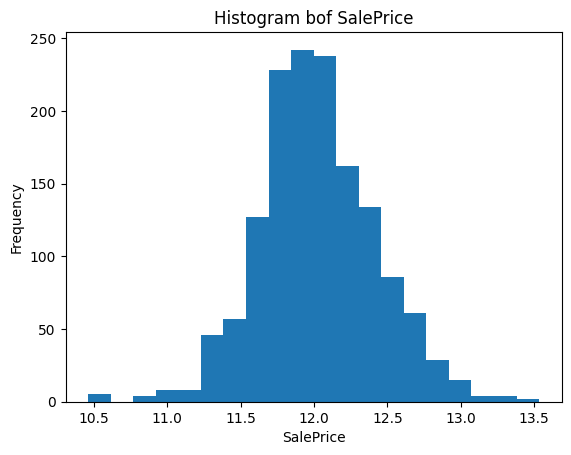

In [ ]:
for feature in continuous_features:
  data = train_df.copy()
  if 0 in data[feature].unique():
      print(f"Skipping {feature} because it contains zero values.")
  else:

      plt.hist(np.log(data[feature]), bins = 20)
      plt.title(f"Histogram bof {feature}")
      plt.xlabel(feature)
      plt.ylabel("Frequency")
      plt.show()

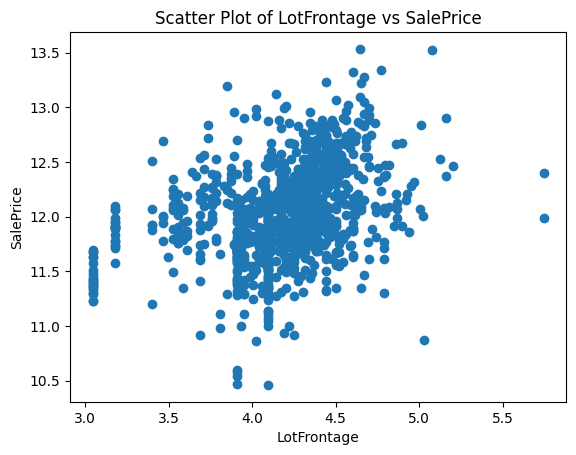

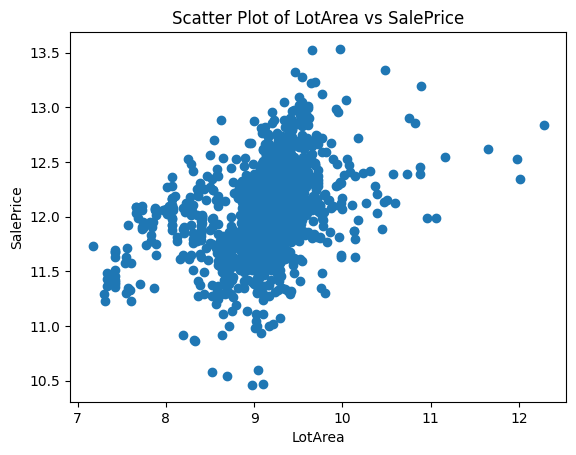

Skipping MasVnrArea because it contains zero values.
Skipping BsmtFinSF1 because it contains zero values.
Skipping BsmtFinSF2 because it contains zero values.
Skipping BsmtUnfSF because it contains zero values.
Skipping TotalBsmtSF because it contains zero values.


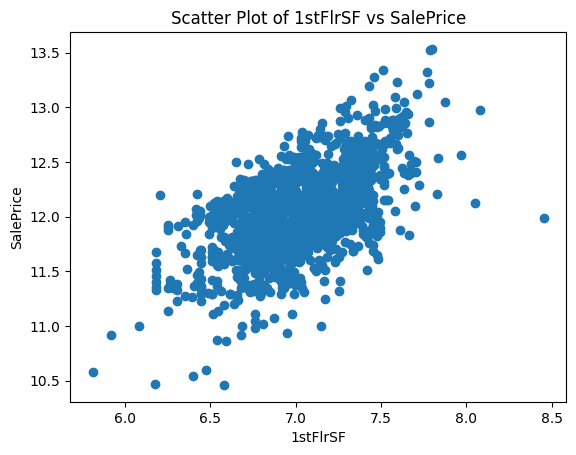

Skipping 2ndFlrSF because it contains zero values.


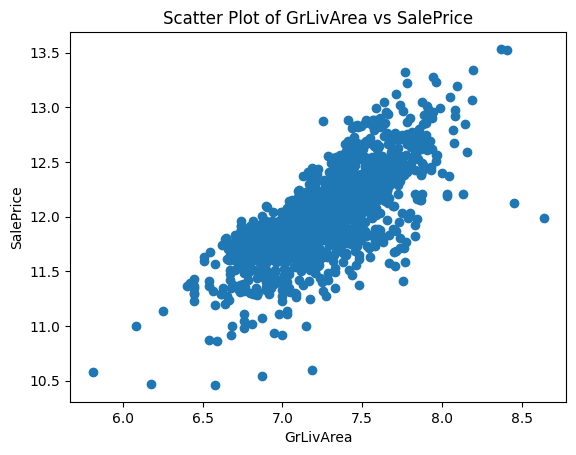

Skipping GarageArea because it contains zero values.
Skipping WoodDeckSF because it contains zero values.
Skipping OpenPorchSF because it contains zero values.
Skipping EnclosedPorch because it contains zero values.
Skipping ScreenPorch because it contains zero values.


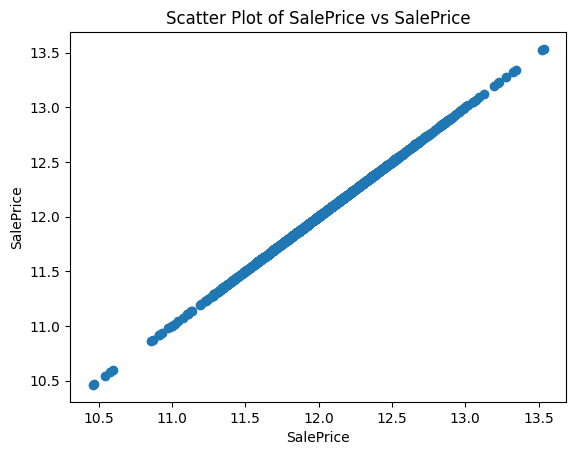

In [ ]:
for feature in continuous_features:
    data = train_df.copy()
    if 0 in data[feature].unique():
         print(f"Skipping {feature} because it contains zero values.")
    else:
       plt.scatter(np.log(data[feature]), np.log(data['SalePrice']))
       plt.title(f"Scatter Plot of {feature} vs SalePrice")
       plt.xlabel(feature)
       plt.ylabel("SalePrice")
       plt.show()

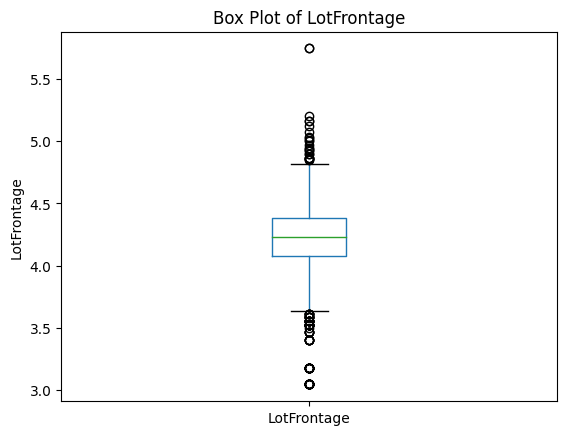

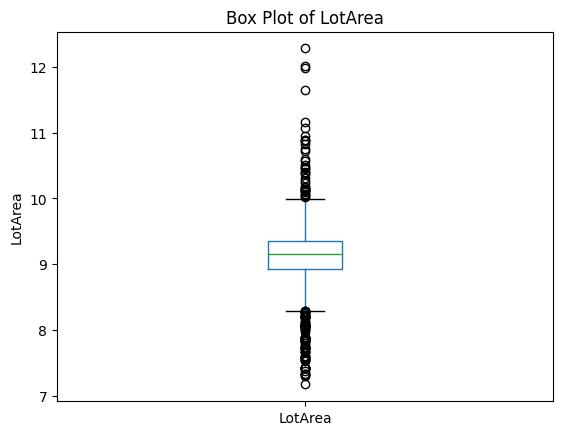

Skipping MasVnrArea because it contains zero values.
Skipping BsmtFinSF1 because it contains zero values.
Skipping BsmtFinSF2 because it contains zero values.
Skipping BsmtUnfSF because it contains zero values.
Skipping TotalBsmtSF because it contains zero values.


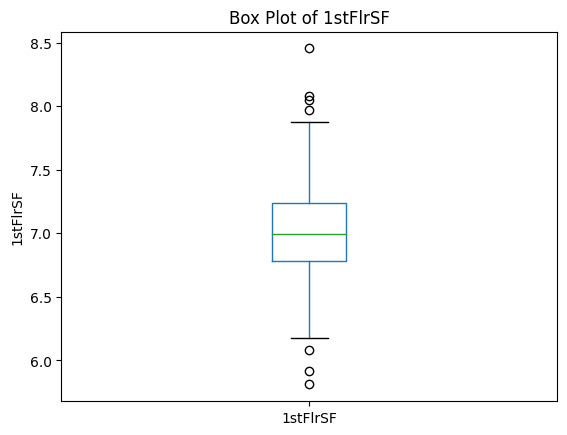

Skipping 2ndFlrSF because it contains zero values.


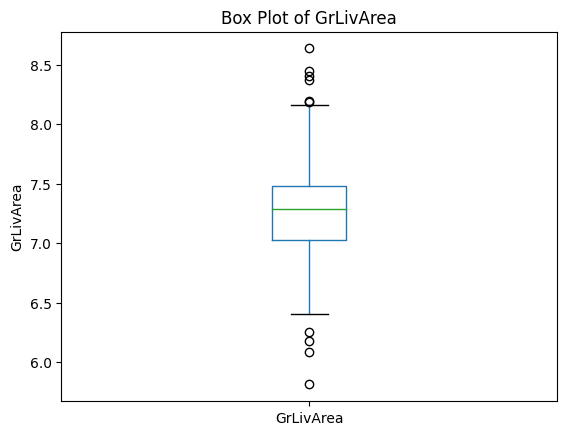

Skipping GarageArea because it contains zero values.
Skipping WoodDeckSF because it contains zero values.
Skipping OpenPorchSF because it contains zero values.
Skipping EnclosedPorch because it contains zero values.
Skipping ScreenPorch because it contains zero values.


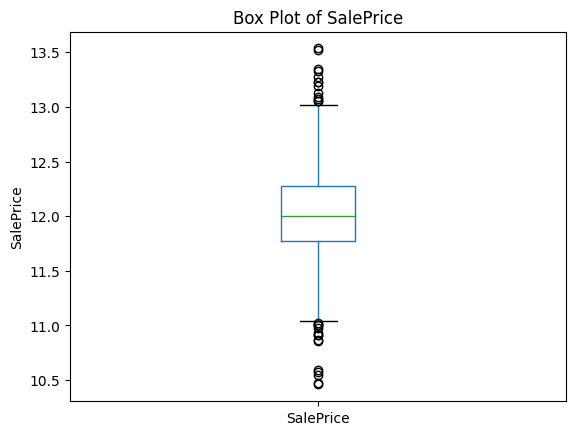

In [ ]:
for feature in continuous_features:
    data=train_df.copy()
    if 0 in data[feature].unique():
         print(f"Skipping {feature} because it contains zero values.")
    else:
       data[feature] = np.log(data[feature])
       data.boxplot(column = feature, grid = False)
       plt.title(f"Box Plot of {feature}")
       plt.ylabel(feature)
       plt.show()

In [5]:
categorical_features = [feature for feature in train_df.columns if train_df[feature].dtypes == 'O']
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [ ]:
train_df[categorical_features].head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd        NaN        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng        NaN        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ         NaN     Attchd   
1          Y      SBrkr          TA        Typ          TA     Attchd   
2          Y      SBrkr          Gd        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Detchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature  \
0          RFn         TA         TA          Y    NaN   NaN         NaN   
1          RFn         TA         TA          Y    NaN   NaN         NaN   
2          RFn         TA         TA          Y    NaN   NaN         NaN   
3          Unf         TA         TA          Y    NaN   NaN         NaN   
4          RFn         TA         TA          Y    NaN   NaN         NaN   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
3       WD       Abnorml  
4       WD        Normal

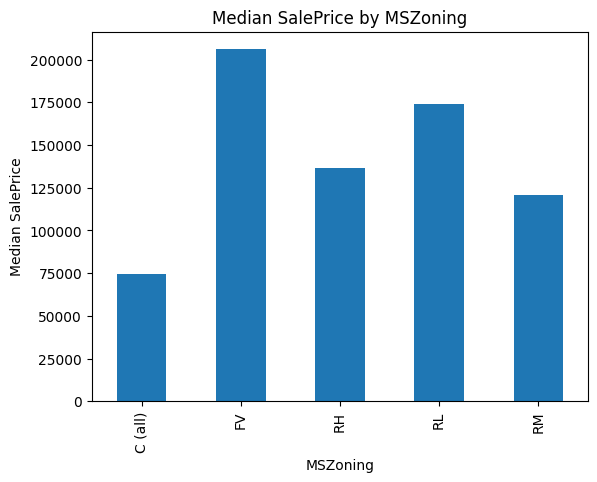

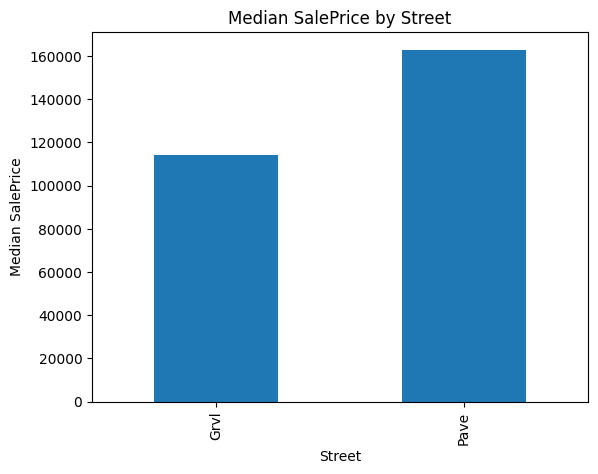

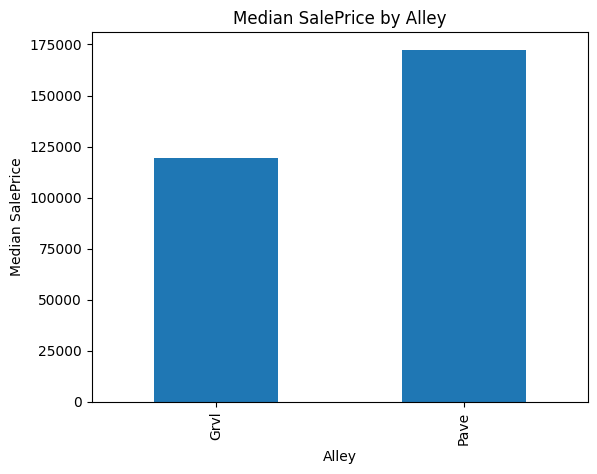

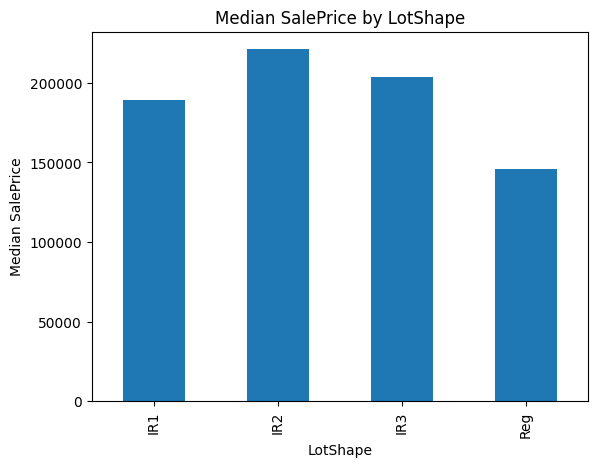

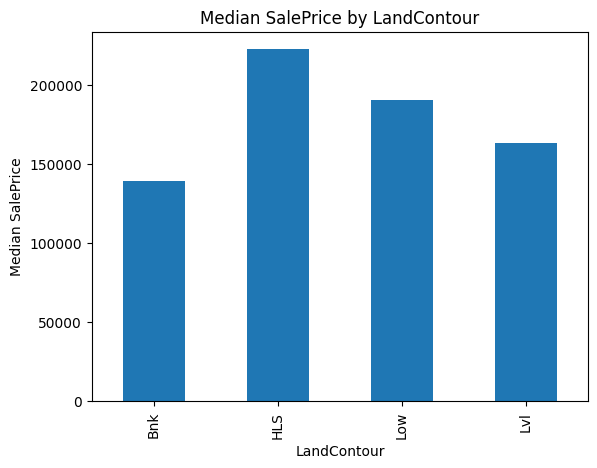

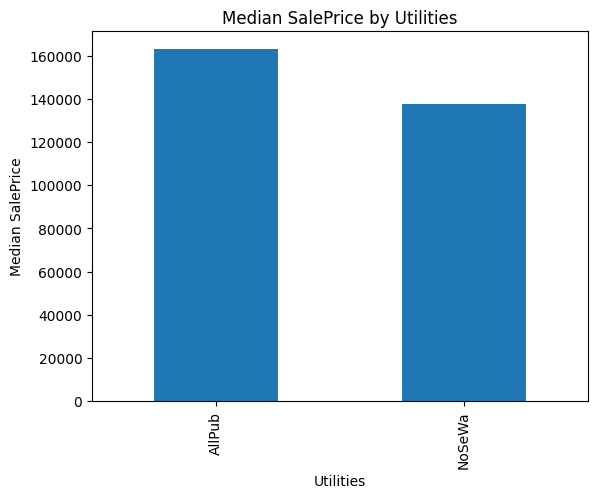

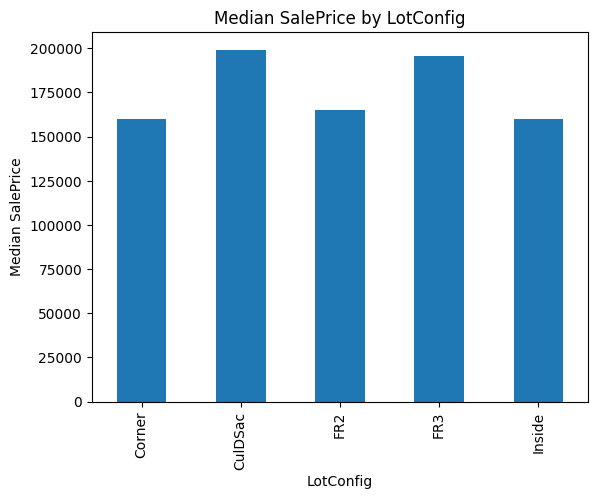

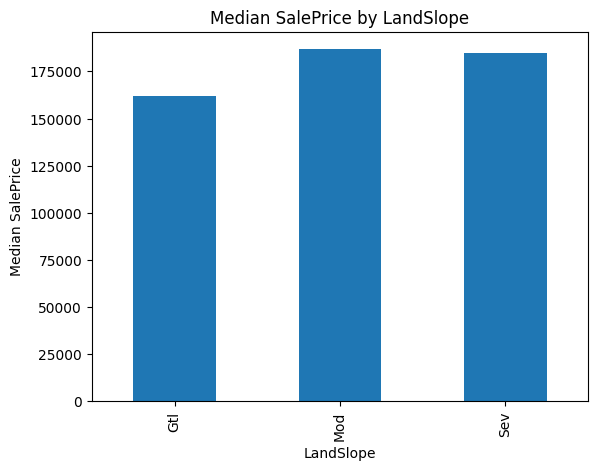

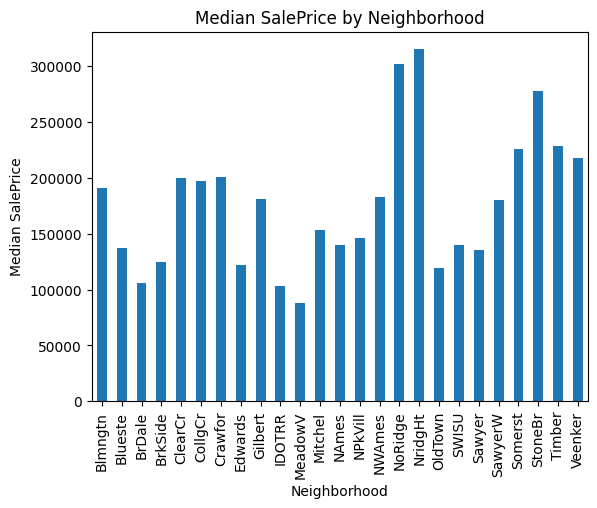

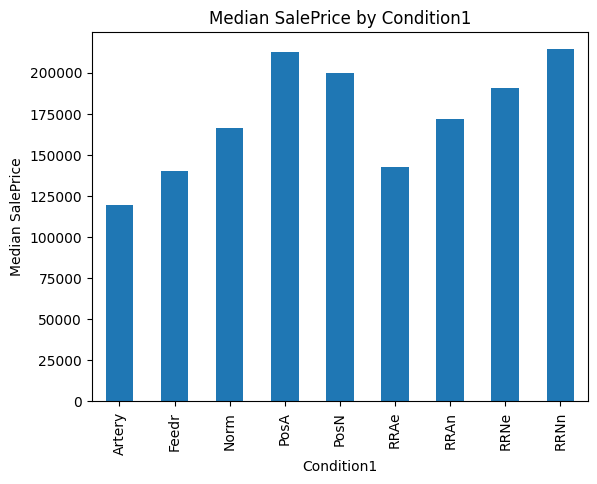

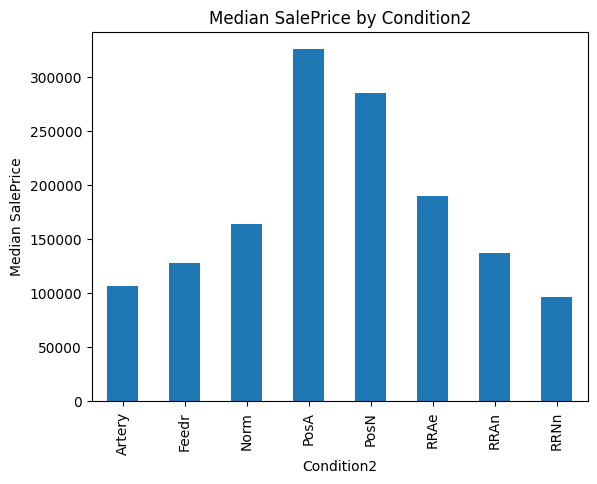

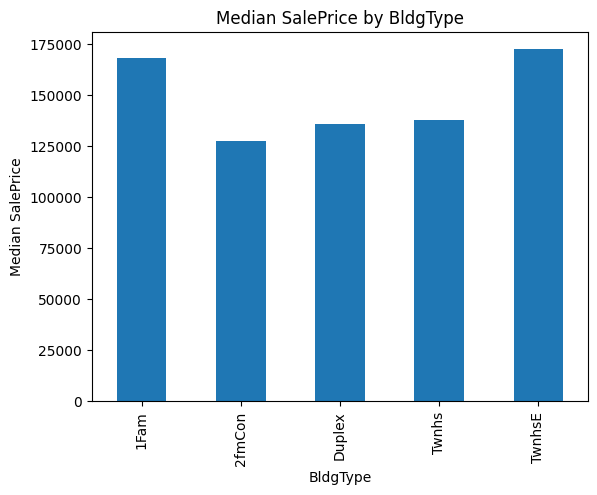

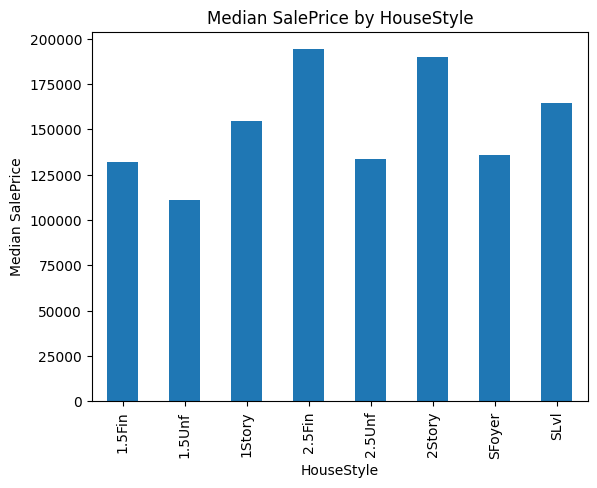

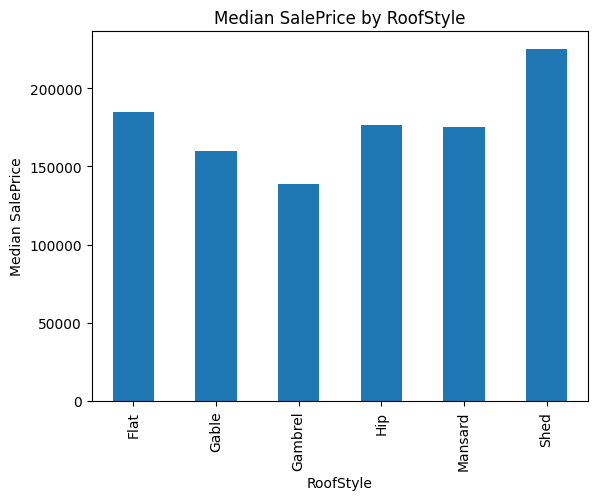

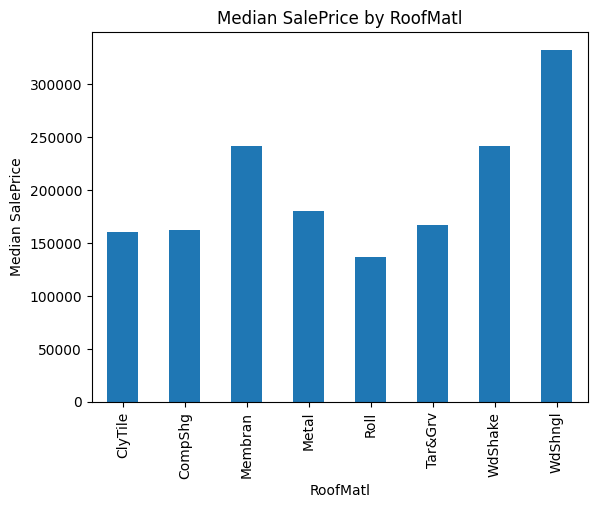

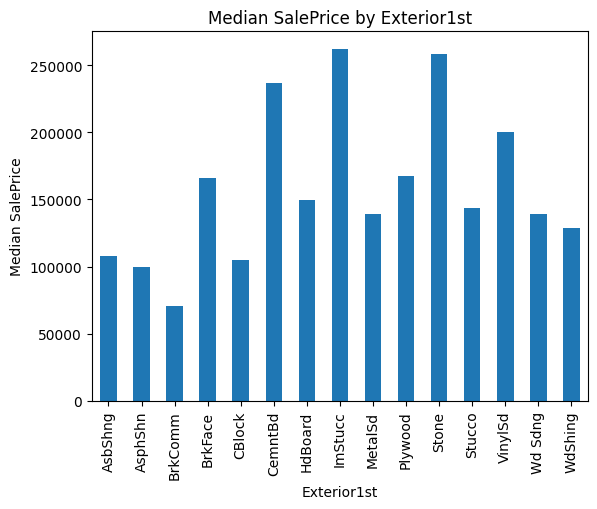

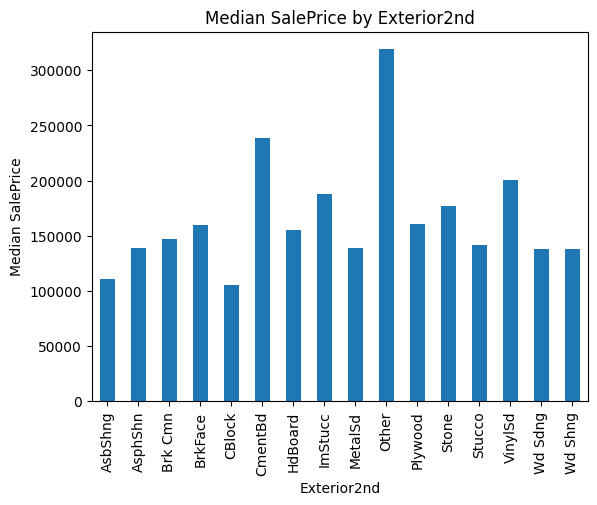

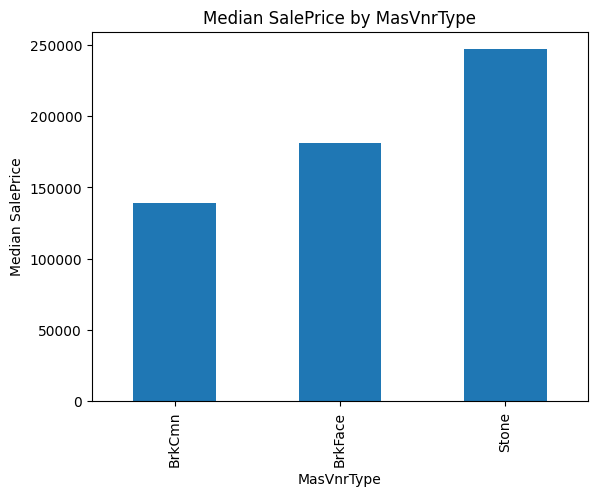

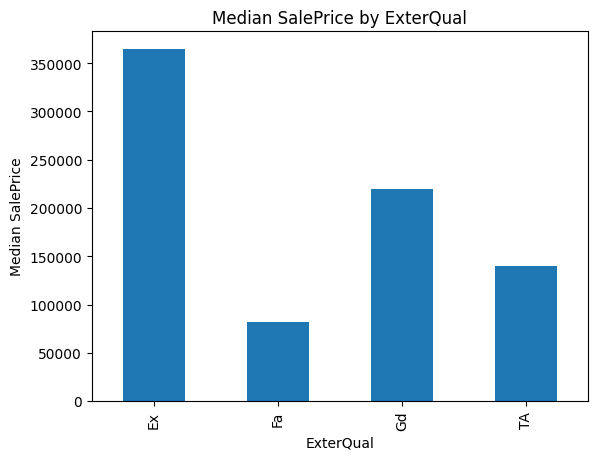

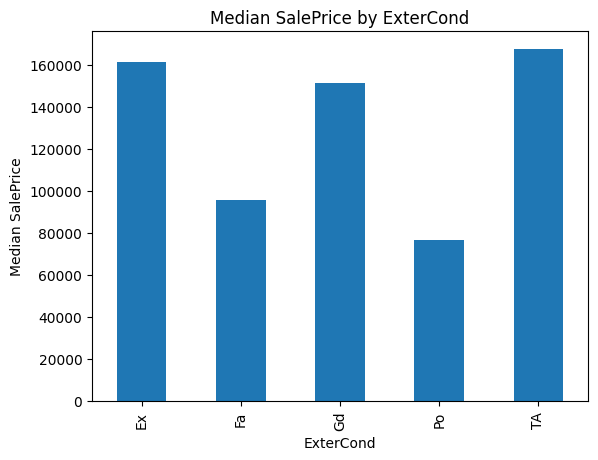

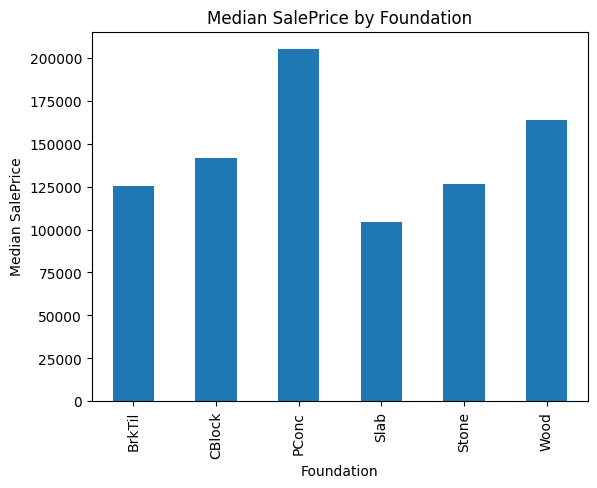

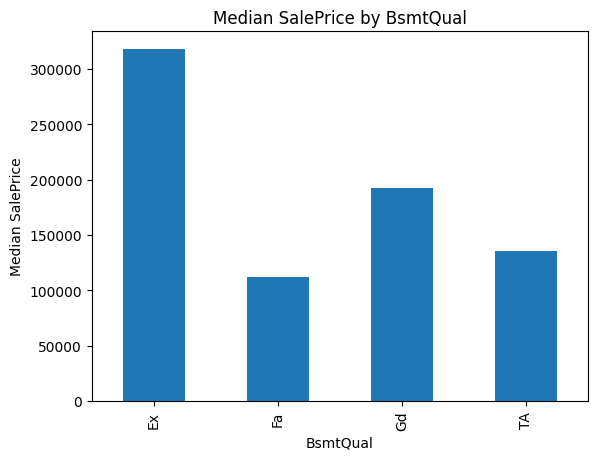

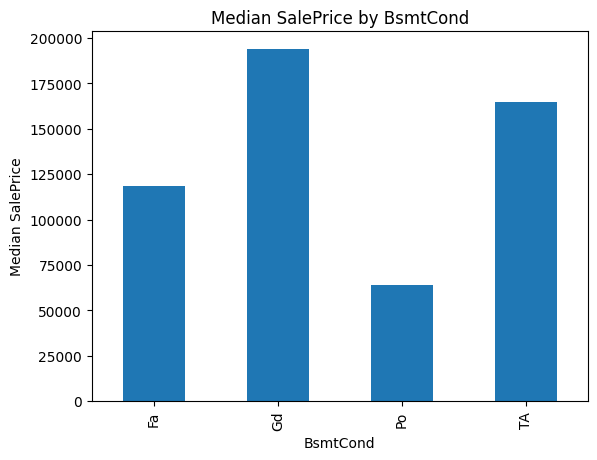

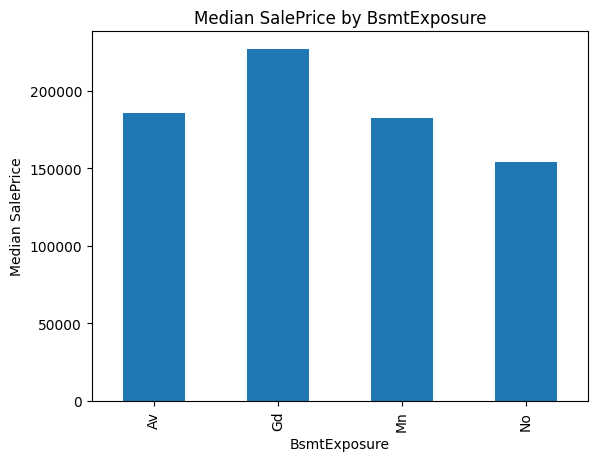

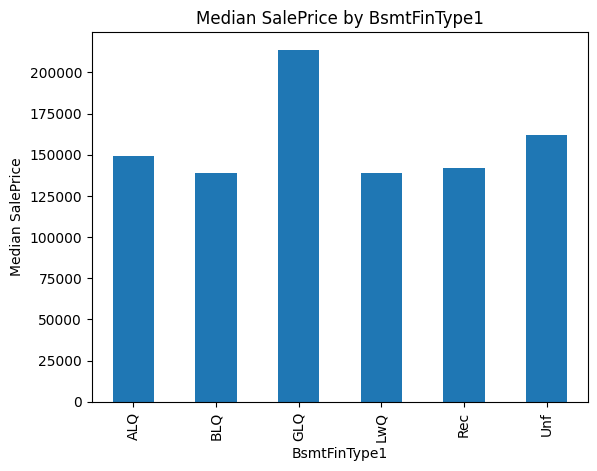

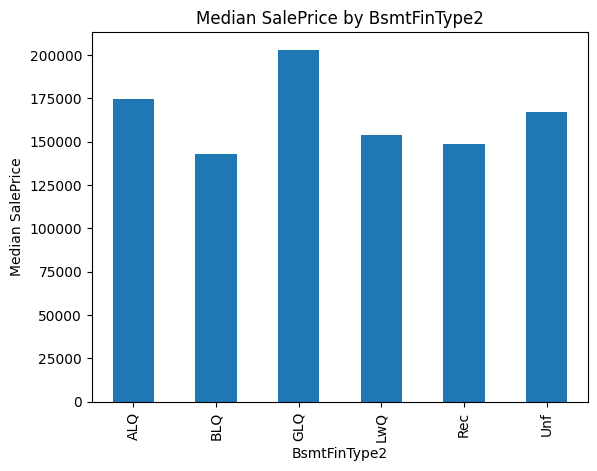

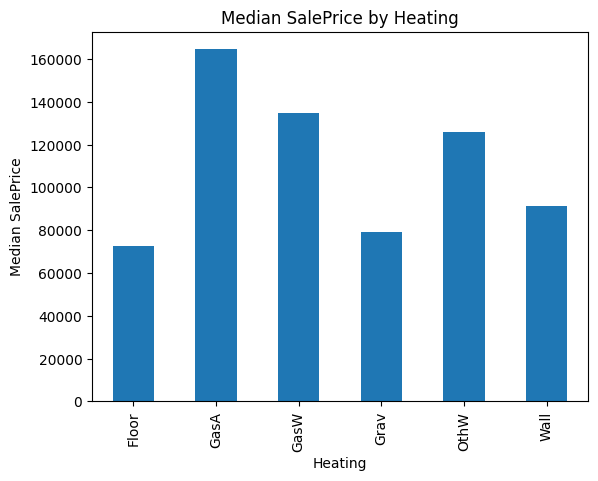

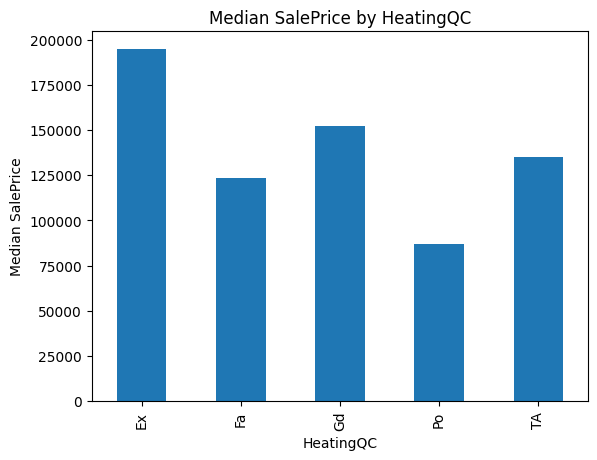

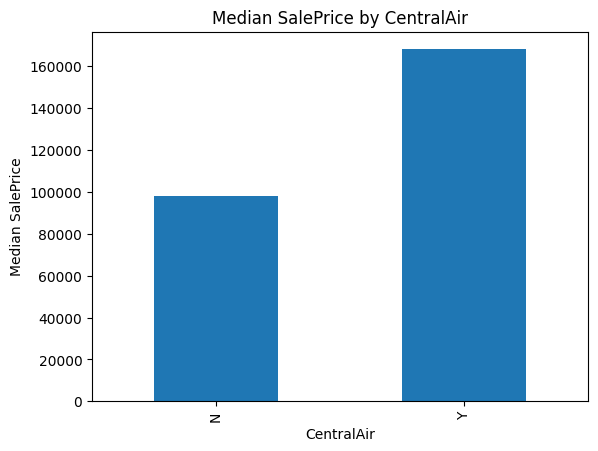

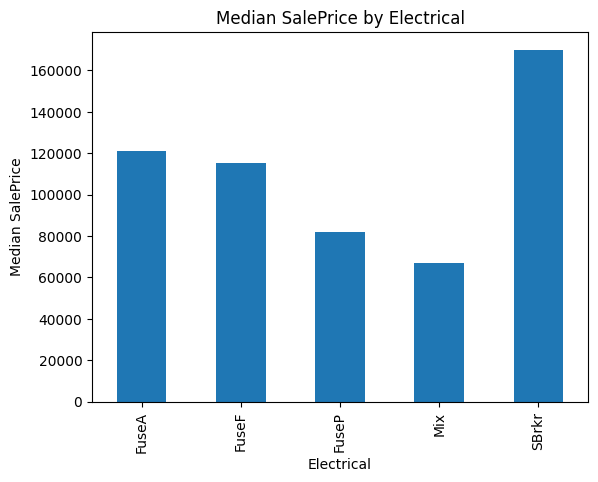

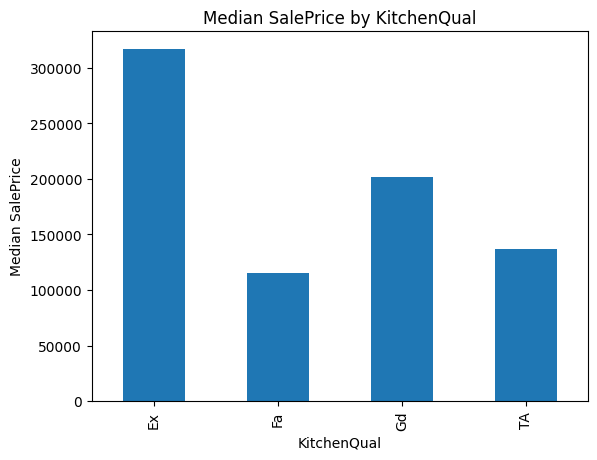

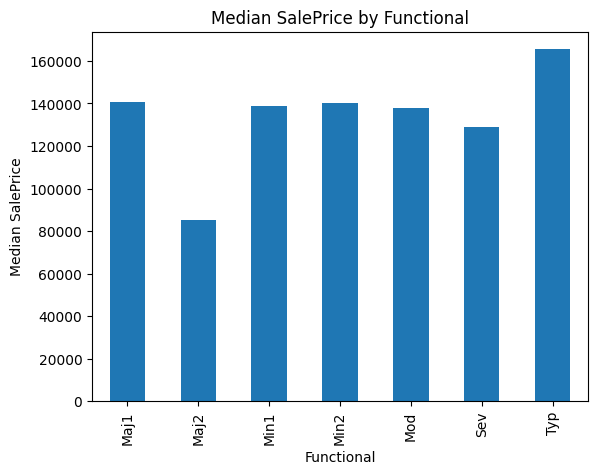

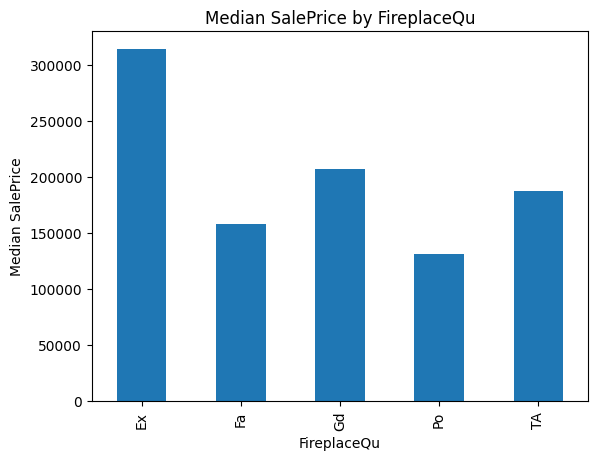

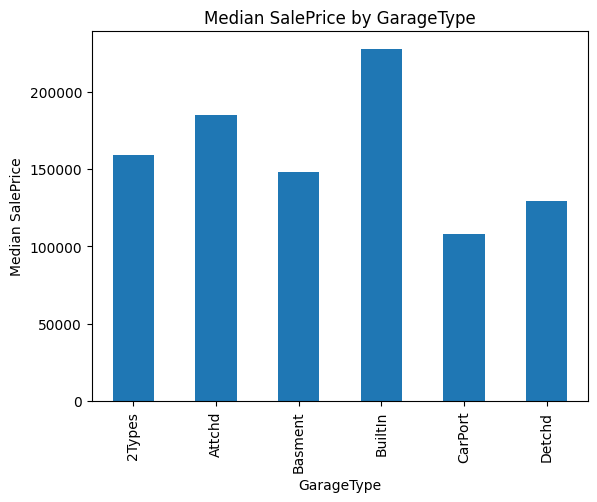

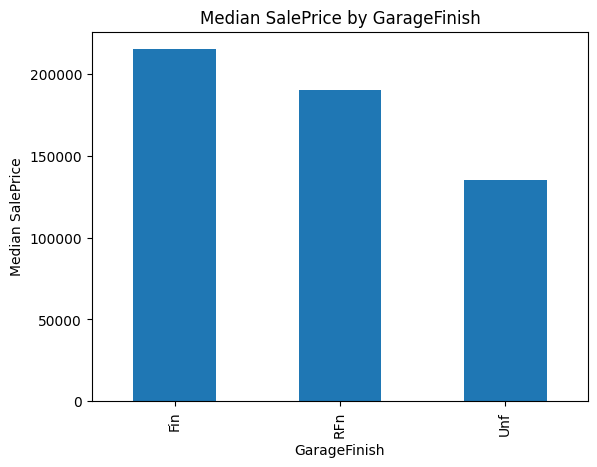

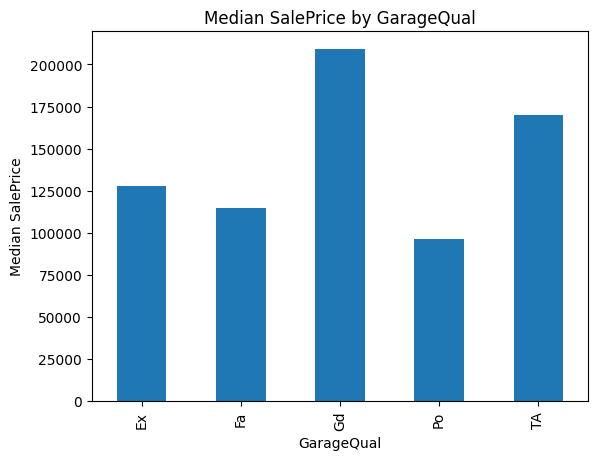

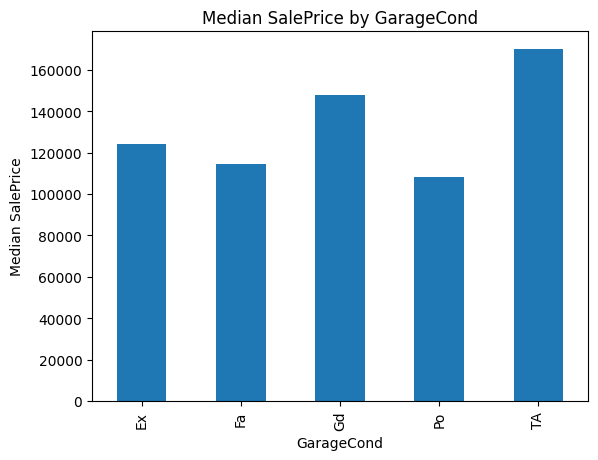

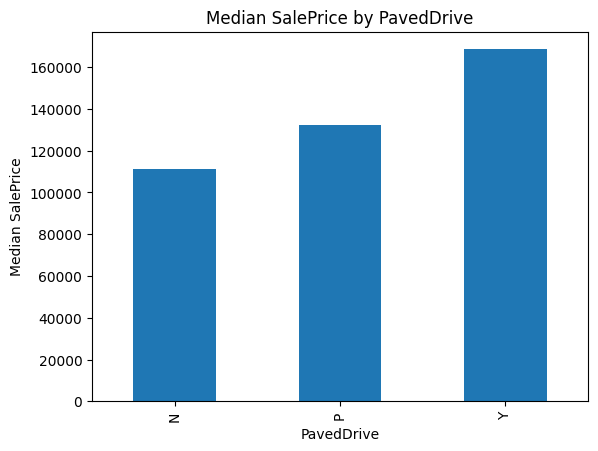

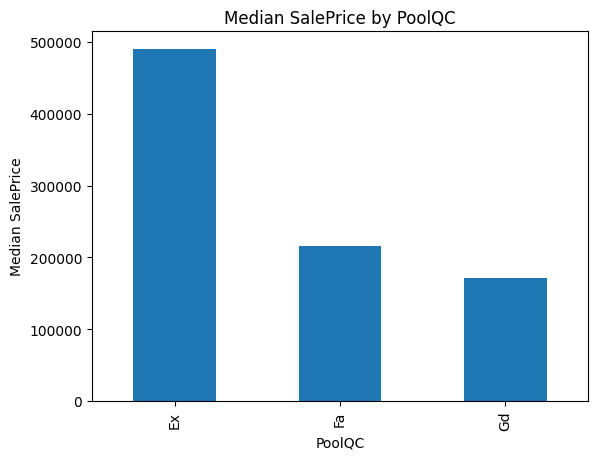

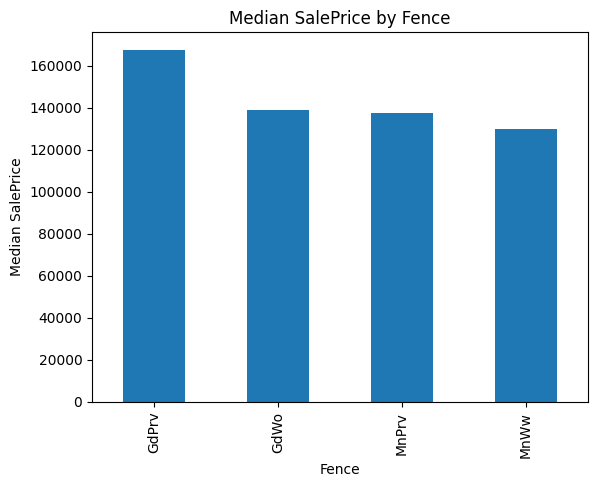

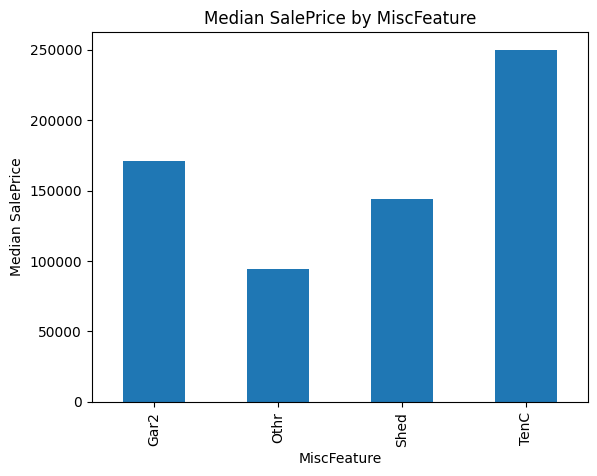

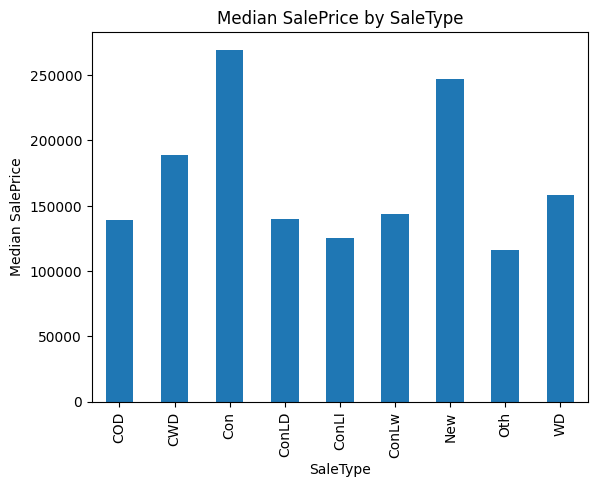

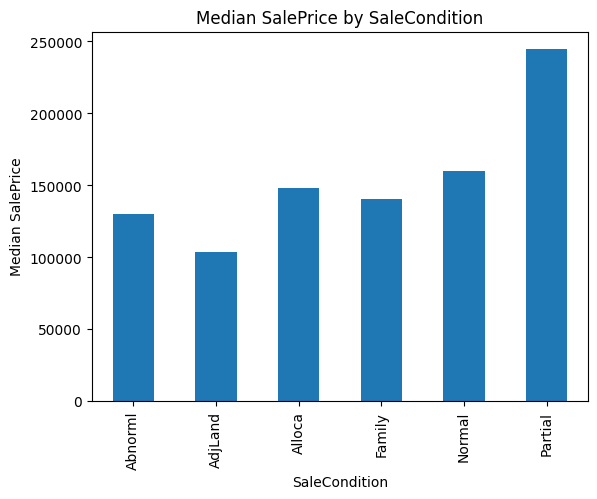

In [ ]:
for feature in categorical_features:
    data=train_df.copy()
    medians = data.groupby(feature)['SalePrice'].median()
    medians.plot.bar()
    plt.title(f"Median SalePrice by {feature}")
    plt.xlabel(feature)
    plt.ylabel("Median SalePrice")
    plt.show()

In [ ]:
for feature in categorical_features:
  print('The feature of {} and their count is {}'. format(feature, train_df[feature].nunique()))

The feature of MSZoning and their count is 5
The feature of Street and their count is 2
The feature of Alley and their count is 2
The feature of LotShape and their count is 4
The feature of LandContour and their count is 4
The feature of Utilities and their count is 2
The feature of LotConfig and their count is 5
The feature of LandSlope and their count is 3
The feature of Neighborhood and their count is 25
The feature of Condition1 and their count is 9
The feature of Condition2 and their count is 8
The feature of BldgType and their count is 5
The feature of HouseStyle and their count is 8
The feature of RoofStyle and their count is 6
The feature of RoofMatl and their count is 8
The feature of Exterior1st and their count is 15
The feature of Exterior2nd and their count is 16
The feature of MasVnrType and their count is 3
The feature of ExterQual and their count is 4
The feature of ExterCond and their count is 5
The feature of Foundation and their count is 6
The feature of BsmtQual and 

#Handling missing data

In [6]:
numericals_null = [feature for feature in train_df.columns if train_df[feature].isnull().sum() > 1 and train_df[feature].dtype != 'O']
numericals_null

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [7]:
for feature in numericals_null:
    median = train_df[feature].median()
    train_df[f"{feature}_missing"] = np.where(train_df[feature].isnull(), 1, 0)
    train_df[feature].fillna(median, inplace=True)


train_df[numericals_null].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [8]:
train_df.head(50
              )

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0    1          60       RL         65.0     8450   Pave   NaN      Reg   
1    2          20       RL         80.0     9600   Pave   NaN      Reg   
2    3          60       RL         68.0    11250   Pave   NaN      IR1   
3    4          70       RL         60.0     9550   Pave   NaN      IR1   
4    5          60       RL         84.0    14260   Pave   NaN      IR1   
5    6          50       RL         85.0    14115   Pave   NaN      IR1   
6    7          20       RL         75.0    10084   Pave   NaN      Reg   
7    8          60       RL         69.0    10382   Pave   NaN      IR1   
8    9          50       RM         51.0     6120   Pave   NaN      Reg   
9   10         190       RL         50.0     7420   Pave   NaN      Reg   
10  11          20       RL         70.0    11200   Pave   NaN      Reg   
11  12          60       RL         85.0    11924   Pave   NaN      IR1   
12  13          20       RL         69.0    12968   Pave   NaN      IR2   
13  14          20       RL         91.0    10652   Pave   NaN      IR1   
14  15          20       RL         69.0    10920   Pave   NaN      IR1   
15  16          45       RM         51.0     6120   Pave   NaN      Reg   
16  17          20       RL         69.0    11241   Pave   NaN      IR1   
17  18          90       RL         72.0    10791   Pave   NaN      Reg   
18  19          20       RL         66.0    13695   Pave   NaN      Reg   
19  20          20       RL         70.0     7560   Pave   NaN      Reg   
20  21          60       RL        101.0    14215   Pave   NaN      IR1   
21  22          45       RM         57.0     7449   Pave  Grvl      Reg   
22  23          20       RL         75.0     9742   Pave   NaN      Reg   
23  24         120       RM         44.0     4224   Pave   NaN      Reg   
24  25          20       RL         69.0     8246   Pave   NaN      IR1   
25  26          20       RL        110.0    14230   Pave   NaN      Reg   
26  27          20       RL         60.0     7200   Pave   NaN      Reg   
27  28          20       RL         98.0    11478   Pave   NaN      Reg   
28  29          20       RL         47.0    16321   Pave   NaN      IR1   
29  30          30       RM         60.0     6324   Pave   NaN      IR1   
30  31          70  C (all)         50.0     8500   Pave  Pave      Reg   
31  32          20       RL         69.0     8544   Pave   NaN      IR1   
32  33          20       RL         85.0    11049   Pave   NaN      Reg   
33  34          20       RL         70.0    10552   Pave   NaN      IR1   
34  35         120       RL         60.0     7313   Pave   NaN      Reg   
35  36          60       RL        108.0    13418   Pave   NaN      Reg   
36  37          20       RL        112.0    10859   Pave   NaN      Reg   
37  38          20       RL         74.0     8532   Pave   NaN      Reg   
38  39          20       RL         68.0     7922   Pave   NaN      Reg   
39  40          90       RL         65.0     6040   Pave   NaN      Reg   
40  41          20       RL         84.0     8658   Pave   NaN      Reg   
41  42          20       RL        115.0    16905   Pave   NaN      Reg   
42  43          85       RL         69.0     9180   Pave   NaN      IR1   
43  44          20       RL         69.0     9200   Pave   NaN      IR1   
44  45          20       RL         70.0     7945   Pave   NaN      Reg   
45  46         120       RL         61.0     7658   Pave   NaN      Reg   
46  47          50       RL         48.0    12822   Pave   NaN      IR1   
47  48          20       FV         84.0    11096   Pave   NaN      Reg   
48  49         190       RM         33.0     4456   Pave   NaN      Reg   
49  50          20       RL         66.0     7742   Pave   NaN      Reg   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1          Lvl    AllPub       FR2

In [9]:
categoricals_null = [feature for feature in train_df.columns if train_df[feature].isnull().sum() > 1 and train_df[feature].dtype == 'O']
categoricals_null

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [10]:
for feature in categoricals_null:
    train_df[f"{feature}_missing"] = np.where(train_df[feature].isnull(), 1, 0)
    train_df[feature].fillna('Missing', inplace=True)


train_df[categoricals_null].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [11]:
train_df[categoricals_null].head()

Alley MasVnrType BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0  Missing    BrkFace       Gd       TA           No          GLQ   
1  Missing    Missing       Gd       TA           Gd          ALQ   
2  Missing    BrkFace       Gd       TA           Mn          GLQ   
3  Missing    Missing       TA       Gd           No          ALQ   
4  Missing    BrkFace       Gd       TA           Av          GLQ   

  BsmtFinType2 FireplaceQu GarageType GarageFinish GarageQual GarageCond  \
0          Unf     Missing     Attchd          RFn         TA         TA   
1          Unf          TA     Attchd          RFn         TA         TA   
2          Unf          TA     Attchd          RFn         TA         TA   
3          Unf          Gd     Detchd          Unf         TA         TA   
4          Unf          TA     Attchd          RFn         TA         TA   

    PoolQC    Fence MiscFeature  
0  Missing  Missing     Missing  
1  Missing  Missing     Missing  
2  Missing  Missing     Missing  
3  Missing  Missing     Missing  
4  Missing  Missing     Missing

In [12]:
train_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  Missing      Reg   
1   2          20       RL         80.0     9600   Pave  Missing      Reg   
2   3          60       RL         68.0    11250   Pave  Missing      IR1   
3   4          70       RL         60.0     9550   Pave  Missing      IR1   
4   5          60       RL         84.0    14260   Pave  Missing      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd    Missing   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng    Missing   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0     Missing   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1      

In [13]:
#from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test=train_test_split(train_df,train_df['SalePrice'],test_size=0.2,random_state=5)

In [14]:
#X_train.shape

(1168, 99)

In [15]:
#X_test.shape

(292, 99)

#Feature Selection


In [16]:
num_features =['GrLivArea', '1stFlrSF', 'LotArea', 'LotFrontage']
for feature in num_features:
  train_df[feature] = np.log(train_df[feature])


In [17]:
train_df[num_features]

GrLivArea  1stFlrSF   LotArea  LotFrontage
1358   7.360740  6.645091  7.657755     4.234107
390    7.220374  6.867974  9.036582     3.912023
1334   7.218910  6.639876  7.769801     3.178054
1072   7.283448  6.909753  8.933928     3.912023
1443   6.858565  6.858565  9.088625     4.234107
...         ...       ...       ...          ...
1424   7.203406  7.203406  9.159363     4.234107
1142   7.947325  7.290293  9.206834     4.343805
998    6.981935  6.981935  9.188708     4.094345
206    7.436028  7.436028  9.523178     3.688879
867    7.021084  7.021084  8.849371     4.442651

[1168 rows x 4 columns]

In [18]:
for feature in categorical_features:
    count_vars = train_df.groupby(feature)['SalePrice'].count()
    temp = count_vars[count_vars < len(train_df) * 0.01].index
    train_df[feature] = np.where(train_df[feature].isin(temp), 'Rare_var', train_df[feature])

In [22]:
train_df.head(90)

Id  MSSubClass  MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0    1          60        RL         65.0     8450   Pave  Missing      Reg   
1    2          20        RL         80.0     9600   Pave  Missing      Reg   
2    3          60        RL         68.0    11250   Pave  Missing      IR1   
3    4          70        RL         60.0     9550   Pave  Missing      IR1   
4    5          60        RL         84.0    14260   Pave  Missing      IR1   
..  ..         ...       ...          ...      ...    ...      ...      ...   
85  86          60        RL        121.0    16059   Pave  Missing      Reg   
86  87          60        RL        122.0    11911   Pave  Missing      IR2   
87  88         160        FV         40.0     3951   Pave     Pave      Reg   
88  89          50  Rare_var        105.0     8470   Pave  Missing      IR1   
89  90          20        RL         60.0     8070   Pave  Missing      Reg   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1          Lvl    AllPub       FR2       Gtl     Rare_var      Feedr   
2          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4          Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
..         ...       ...       ...       ...          ...        ...   
85         Lvl    AllPub    Corner       Gtl      NoRidge       Norm   
86         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
87         Lvl    AllPub    Corner       Gtl      Somerst       Norm   
88         Lvl    AllPub    Corner       Gtl       IDOTRR      Feedr   
89         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0        Norm     1Fam     2Story            7            5       2003   
1        Norm     1Fam     1Story            6            8       1976   
2        Norm     1Fam     2Story            7            5       2001   
3        Norm     1Fam     2Story            7            5       1915   
4        Norm     1Fam     2Story            8            5       2000   
..        ...      ...        ...          ...          ...        ...   
85       Norm     1Fam     2Story            8            5       1991   
86       Norm     1Fam     2Story            6            5       2005   
87       Norm   TwnhsE     2Story            6            5       2009   
88   Rare_var     1Fam     1.5Fin            3            2       1915   
89       Norm     1Fam     1Story            4            5       1994   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0           2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1           1976     Gable  CompShg     MetalSd     MetalSd    Missing   
2           2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3           1970     Gable  CompShg     Wd Sdng     Wd Shng    Missing   
4           2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
..           ...       ...      ...         ...         ...        ...   
85          1992       Hip  CompShg     HdBoard     HdBoard    BrkFace   
86          2005     Gable  CompShg     VinylSd     VinylSd    Missing   
87          2009     Gable  CompShg     VinylSd     VinylSd      Stone   
88          1982       Hip  CompShg     Plywood     Plywood    Missing   
89          1995     Gable  CompShg     VinylSd     VinylSd    Missing   

    MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0        196.0        Gd        TA      PConc       Gd       TA           No   
1          0.0        TA        TA     CBlock       Gd       TA           Gd   
2        162.0        Gd        TA      PConc       Gd       TA           Mn   
3          0.0        TA        TA     BrkTil       TA       Gd           No   
4        350

In [23]:
from sklearn.preprocessing import LabelEncoder


In [25]:
le = LabelEncoder()
for features in categorical_features:
  train_df[features] = le.fit_transform(train_df[features])

train_df.head(10
              )

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0   1          60         2         65.0     8450       0      1         3   
1   2          20         2         80.0     9600       0      1         3   
2   3          60         2         68.0    11250       0      1         0   
3   4          70         2         60.0     9550       0      1         0   
4   5          60         2         84.0    14260       0      1         0   
5   6          50         2         85.0    14115       0      1         0   
6   7          20         2         75.0    10084       0      1         3   
7   8          60         2         69.0    10382       0      1         0   
8   9          50         3         51.0     6120       0      1         3   
9  10         190         2         50.0     7420       0      1         3   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            3          0          3          0             4           2   
1            3          0          2          0            16           1   
2            3          0          3          0             4           2   
3            3          0          0          0             5           2   
4            3          0          2          0            13           2   
5            3          0          3          0            10           2   
6            3          0          3          0            20           2   
7            3          0          0          0            12           3   
8            3          0          3          0            15           0   
9            3          0          0          0             2           0   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           0         0           2            7            5       2003   
1           0         0           1            6            8       1976   
2           0         0           2            7            5       2001   
3           0         0           2            7            5       1915   
4           0         0           2            8            5       2000   
5           0         0           0            5            5       1993   
6           0         0           1            8            5       2004   
7           0         0           2            7            6       1973   
8           0         0           0            7            5       1931   
9           1         1           3            5            6       1939   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0          2003          0         0            8            8           1   
1          1976          0         0            4            4           2   
2          2002          0         0            8            8           1   
3          1970          0         0            9           10           2   
4          2000          0         0            8            8           1   
5          1995          0         0            8            8           2   
6          2005          0         0            8            8           3   
7          1973          0         0            3            3           3   
8          1950          0         0            1           10           2   
9          1950          0         0            4            4           2   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0       196.0          1          3           2         2         4   
1         0.0          3          3           1         2         4   
2       162.0          1          3           2         2         4   
3         0.0          3          3           0         4         1   
4       350.0          1          3           2         2         4   
5         0.0          3          3           3         2         4   
6       186.0          1          3           2         0         4   
7       240.0          3        

In [26]:
for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:

    train_df[feature]=train_df['YrSold']-train_df[feature]

In [28]:
train_df[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

YearBuilt  YearRemodAdd  GarageYrBlt
0          5             5          5.0
1         31            31         31.0
2          7             6          7.0
3         91            36          8.0
4          8             8          8.0

#Scaling


In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
standard_scaler = StandardScaler()

In [37]:
feature_scale = [feature for feature in train_df.columns if feature not in ['Id', 'SalePrice'] and 'missing' not in feature]

In [39]:
feature_scale

79

In [40]:
standard_scaler.fit(train_df[feature_scale])

StandardScaler()

In [41]:
standard_scaler.transform(train_df[feature_scale])

array([[ 0.07337496, -0.10476376, -0.22087509, ...,  0.13877749,
         0.37270829,  0.06887066],
       [-0.87256276, -0.10476376,  0.46031974, ..., -0.61443862,
         0.37270829,  0.06887066],
       [ 0.07337496, -0.10476376, -0.08463612, ...,  0.13877749,
         0.37270829,  0.06887066],
       ...,
       [ 0.30985939, -0.10476376, -0.1754621 , ...,  1.64520971,
         0.37270829,  0.06887066],
       [-0.87256276, -0.10476376, -0.08463612, ...,  1.64520971,
         0.37270829,  0.06887066],
       [-0.87256276, -0.10476376,  0.23325479, ...,  0.13877749,
         0.37270829,  0.06887066]])

In [42]:
data = pd.concat([train_df[['Id', 'SalePrice']].reset_index(drop=True),
                    pd.DataFrame(standard_scaler.transform(train_df[feature_scale]), columns=feature_scale)],
                    axis=1)

In [43]:
data.head()

Id  SalePrice  MSSubClass  MSZoning  LotFrontage   LotArea    Street  \
0   1     208500    0.073375 -0.104764    -0.220875 -0.207142 -0.064238   
1   2     181500   -0.872563 -0.104764     0.460320 -0.091886 -0.064238   
2   3     223500    0.073375 -0.104764    -0.084636  0.073480 -0.064238   
3   4     140000    0.309859 -0.104764    -0.447940 -0.096897 -0.064238   
4   5     250000    0.073375 -0.104764     0.641972  0.375148 -0.064238   

      Alley  LotShape  LandContour  Utilities  LotConfig  LandSlope  \
0  0.024699  0.750731     0.314667   -0.02618   0.585122  -0.225716   
1  0.024699  0.750731     0.314667   -0.02618  -0.252405  -0.225716   
2  0.024699 -1.378933     0.314667   -0.02618   0.585122  -0.225716   
3  0.024699 -1.378933     0.314667   -0.02618  -1.927460  -0.225716   
4  0.024699 -1.378933     0.314667   -0.02618  -0.252405  -0.225716   

   Neighborhood  Condition1  Condition2  BldgType  HouseStyle  OverallQual  \
0     -1.214254    0.029208   -0.101885 -0.411691    0.459130     0.651479   
1      0.852963   -1.493762   -0.101885 -0.411691   -0.456621    -0.071836   
2     -1.214254    0.029208   -0.101885 -0.411691    0.459130     0.651479   
3     -1.041986    0.029208   -0.101885 -0.411691    0.459130     0.651479   
4      0.336159    0.029208   -0.101885 -0.411691    0.459130     1.374795   

   OverallCond  YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  \
0    -0.517200  -1.043259     -0.869941  -0.504727 -0.134652     0.766689   
1     2.179628  -0.183465      0.390141  -0.504727 -0.134652    -0.740368   
2    -0.517200  -0.977121     -0.821476  -0.504727 -0.134652     0.766689   
3    -0.517200   1.800676      0.632464  -0.504727 -0.134652     1.143454   
4    -0.517200  -0.944052     -0.724547  -0.504727 -0.134652     0.766689   

   Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  \
0     0.753686   -1.241449    0.514104  -1.185218   0.365317    0.801196   
1    -0.807692    0.387047   -0.570750   0.765648   0.365317   -0.544887   
2     0.753686   -1.241449    0.325915  -1.185218   0.365317    0.801196   
3     1.534375    0.387047   -0.570750   0.765648   0.365317   -1.890970   
4     0.753686   -1.241449    1.366489  -1.185218   0.365317    0.801196   

   BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  \
0 -0.566939  0.325405      0.651473     -0.510942    0.575425      0.352082   
1 -0.566939  0.325405     -1.281760     -1.399536    1.171992      0.352082   
2 -0.566939  0.325405      0.007062     -0.510942    0.092907      0.352082   
3  0.997770 -2.834848      0.651473     -1.399536   -0.499274      0.352082   
4 -0.566939  0.325405     -1.926170     -0.510942    0.463568      0.352082   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF   Heating  HeatingQC  CentralAir  \
0   -0.288653  -0.944591    -0.459303 -0.141339  -0.884658    0.263813   
1   -0.288653  -0.641228     0.466465 -0.141339  -0.884658    0.263813   
2   -0.288653  -0.301643    -0.313369 -0.141339  -0.884658    0.263813   
3   -0.288653  -0.061670    -0.687324 -0.141339   0.265476    0.263813   
4   -0.288653  -0.174865     0.199680 -0.141339  -0.884658    0.263813   

   Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0    0.299027 -0.793434  1.161852     -0.120242   0.370333      1.107810   
1    0.299027  0.257140 -0.795163     -0.120242  -0.482512     -0.819964   
2    0.299027 -0.627826  1.189351     -0.120242   0.515013      1.107810   
3    0.299027 -0.521734  0.937276     -0.120242   0.383659      1.107810   
4    0.299027 -0.045611  1.617877     -0.120242   1.299326      1.107810   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  \
0     -0.241061  0.789741  1.227585      0.163779     -0.211454    -0.409369   
1      3.948809  0.789741 -0.761621      0.163779     -0.211454     0.795629   
2     -0.241061  0.789741  1.227585      0.163779     -0.211454    -0.409369   
3     -0.241061 -1.026041 -0.761621    